In [1]:
### Understand the directory

import pandas as pd
import os
print("current directory:", os.getcwd())
print("\ncontents of current directory:")
for item in os.listdir('.'):
    print(f"  {item}")

print("\ncontents of parent directory:")
try:
    for item in os.listdir('..'):
        print(f"  {item}")
except:
    print("  can't access parent directory")

current directory: /home/jovyan/GlioGrade

contents of current directory:
  .git
  PDGM
  .ipynb_checkpoints
  tractography_output
  tumor_connectivity.ipynb
  patient_level_comprehensive_features.csv
  feature_construction_voxel.ipynb
  feature_construction_peritumor.ipynb
  README.md
  patient_level_summary_full.csv
  tractography_output_fixed
  untitled.txt
  key_patient_level_comprehensive_features.txt
  cross_validation_summary.csv
  roc_curve.png
  binary_classification_summary.csv
  machine_learning.ipynb
  logistic_feature_importance_analysis.png
  logistic_feature_importance.csv
  Untitled.ipynb
  intracortical_myelination.ipynb
  patient_level_myelin_features.csv
  myelin_statistical_analysis.png
  myelin_significant_findings.csv
  adjusted_myelin_analysis.png
  adjusted_myelin_analysis_summary.csv
  Deep_Learning
  batch_disruption_results

contents of parent directory:
  shared
  curriculum
  .local
  .ipython
  .npm
  .jupyter
  .config
  .cache
  .gitconfig
  .ssh
  git-p

In [2]:
import os
from pathlib import Path
from collections import defaultdict

def explore_ucsf_dataset(base_path="/home/jovyan/shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5"):
    """explore the structure of the ucsf glioma dataset"""
    
    base = Path(base_path)
    if not base.exists():
        print(f"path doesn't exist: {base_path}")
        return
    
    # get all patient directories
    patient_dirs = [d for d in base.iterdir() if d.is_dir()]
    
    print(f"total patient directories: {len(patient_dirs)}")
    print(f"first 10 patient names: {[d.name for d in patient_dirs[:10]]}")
    
    # analyze file structure within patient dirs
    file_types = defaultdict(int)
    folder_structures = defaultdict(int)
    
    sample_patient = None
    
    for i, patient_dir in enumerate(patient_dirs[:20]):  # sample first 20
        print(f"\n--- patient: {patient_dir.name} ---")
        
        # capture first patient for detailed analysis
        if i == 0:
            sample_patient = patient_dir
        
        contents = list(patient_dir.iterdir())
        dirs = [c for c in contents if c.is_dir()]
        files = [c for c in contents if c.is_file()]
        
        print(f"  subdirectories ({len(dirs)}): {[d.name for d in dirs]}")
        print(f"  files ({len(files)}): {[f.name for f in files]}")
        
        # track patterns
        structure_key = tuple(sorted([d.name for d in dirs]))
        folder_structures[structure_key] += 1
        
        for f in files:
            file_types[f.suffix.lower()] += 1
    
    print(f"\n--- file type summary ---")
    for ext, count in sorted(file_types.items()):
        print(f"  {ext if ext else 'no extension'}: {count}")
    
    print(f"\n--- common folder structures ---")
    for structure, count in sorted(folder_structures.items(), key=lambda x: x[1], reverse=True):
        print(f"  {structure}: {count} patients")
    
    # deep dive into sample patient
    if sample_patient:
        print(f"\n--- detailed analysis of {sample_patient.name} ---")
        explore_patient_deep(sample_patient)

def explore_patient_deep(patient_path):
    """deeply explore a single patient directory"""
    
    def walk_directory(path, level=0):
        indent = "  " * level
        for item in sorted(path.iterdir()):
            if item.is_dir():
                print(f"{indent}{item.name}/")
                if level < 3:  # prevent too deep recursion
                    walk_directory(item, level + 1)
            else:
                size_mb = item.stat().st_size / (1024*1024)
                print(f"{indent}{item.name} ({size_mb:.1f} MB)")
    
    walk_directory(patient_path)

# run the exploration
explore_ucsf_dataset()

total patient directories: 501
first 10 patient names: ['UCSF-PDGM-0004_nifti', 'UCSF-PDGM-0005_nifti', 'UCSF-PDGM-0007_nifti', 'UCSF-PDGM-0008_nifti', 'UCSF-PDGM-0009_nifti', 'UCSF-PDGM-0010_nifti', 'UCSF-PDGM-0011_nifti', 'UCSF-PDGM-0012_nifti', 'UCSF-PDGM-0013_nifti', 'UCSF-PDGM-0014_nifti']

--- patient: UCSF-PDGM-0004_nifti ---
  subdirectories (0): []
  files (24): ['UCSF-PDGM-0004_ADC.nii.gz', 'UCSF-PDGM-0004_ASL.nii.gz', 'UCSF-PDGM-0004_DTI_eddy.eddy_rotated_bvecs', 'UCSF-PDGM-0004_DTI_eddy_FA.nii.gz', 'UCSF-PDGM-0004_DTI_eddy_L1.nii.gz', 'UCSF-PDGM-0004_DTI_eddy_L2.nii.gz', 'UCSF-PDGM-0004_DTI_eddy_L3.nii.gz', 'UCSF-PDGM-0004_DTI_eddy_MD.nii.gz', 'UCSF-PDGM-0004_DTI_eddy_noreg.nii.gz', 'UCSF-PDGM-0004_DWI.nii.gz', 'UCSF-PDGM-0004_DWI_bias.nii.gz', 'UCSF-PDGM-0004_FLAIR.nii.gz', 'UCSF-PDGM-0004_FLAIR_bias.nii.gz', 'UCSF-PDGM-0004_SWI.nii.gz', 'UCSF-PDGM-0004_SWI_bias.nii.gz', 'UCSF-PDGM-0004_T1.nii.gz', 'UCSF-PDGM-0004_T1_bias.nii.gz', 'UCSF-PDGM-0004_T1c.nii.gz', 'UCSF-PDGM-00

In [2]:
### Import the clinical metadata
import pandas as pd
metadata = pd.read_csv('PDGM/UCSF-PDGM-metadata_v5_cleaned.csv')
metadata.head()

,ID,Sex,Age at MRI,WHO CNS Grade,Final pathologic diagnosis (WHO 2021),MGMT status,MGMT index,1p/19q,IDH,1-dead 0-alive,OS,EOR,Biopsy prior to imaging,BraTS21 ID,BraTS21 Segmentation Cohort,BraTS21 MGMT Cohort
0,UCSF-PDGM-004,M,66,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,1303.0,STR,No,BraTS2021_00097,Training,Training
1,UCSF-PDGM-005,F,80,4,"Glioblastoma, IDH-wildtype",unknown,unknown,unknown,wildtype,1,274.0,biopsy,No,NaN,NaN,NaN
2,UCSF-PDGM-007,M,70,4,"Glioblastoma, IDH-wildtype",unknown,unknown,unknown,wildtype,1,417.0,STR,No,BraTS2021_00103,Training,NaN
3,UCSF-PDGM-008,M,70,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,185.0,STR,No,NaN,NaN,NaN
4,UCSF-PDGM-009,F,68,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,389.0,STR,No,BraTS2021_00049,Training,Training


Loading patient data...
Dataset shape: (500, 67)
Total patients: 500

Grade distribution:
grade_group
High-grade (4)     401
Low-grade (2+3)     99
Name: count, dtype: int64

Age statistics by grade:
                 count  mean   std  median  min  max
grade_group                                         
High-grade (4)     401  60.1  13.4    61.0   17   94
Low-grade (2+3)     99  43.7  14.0    43.0   19   78

Statistical comparison:
Low-grade mean age: 43.7 ± 14.0 years
High-grade mean age: 60.1 ± 13.4 years
Difference: 16.4 years
Mann-Whitney U statistic: 7988.0
p-value: 3.10e-20
Cohen's d: 1.208
Significance: ***


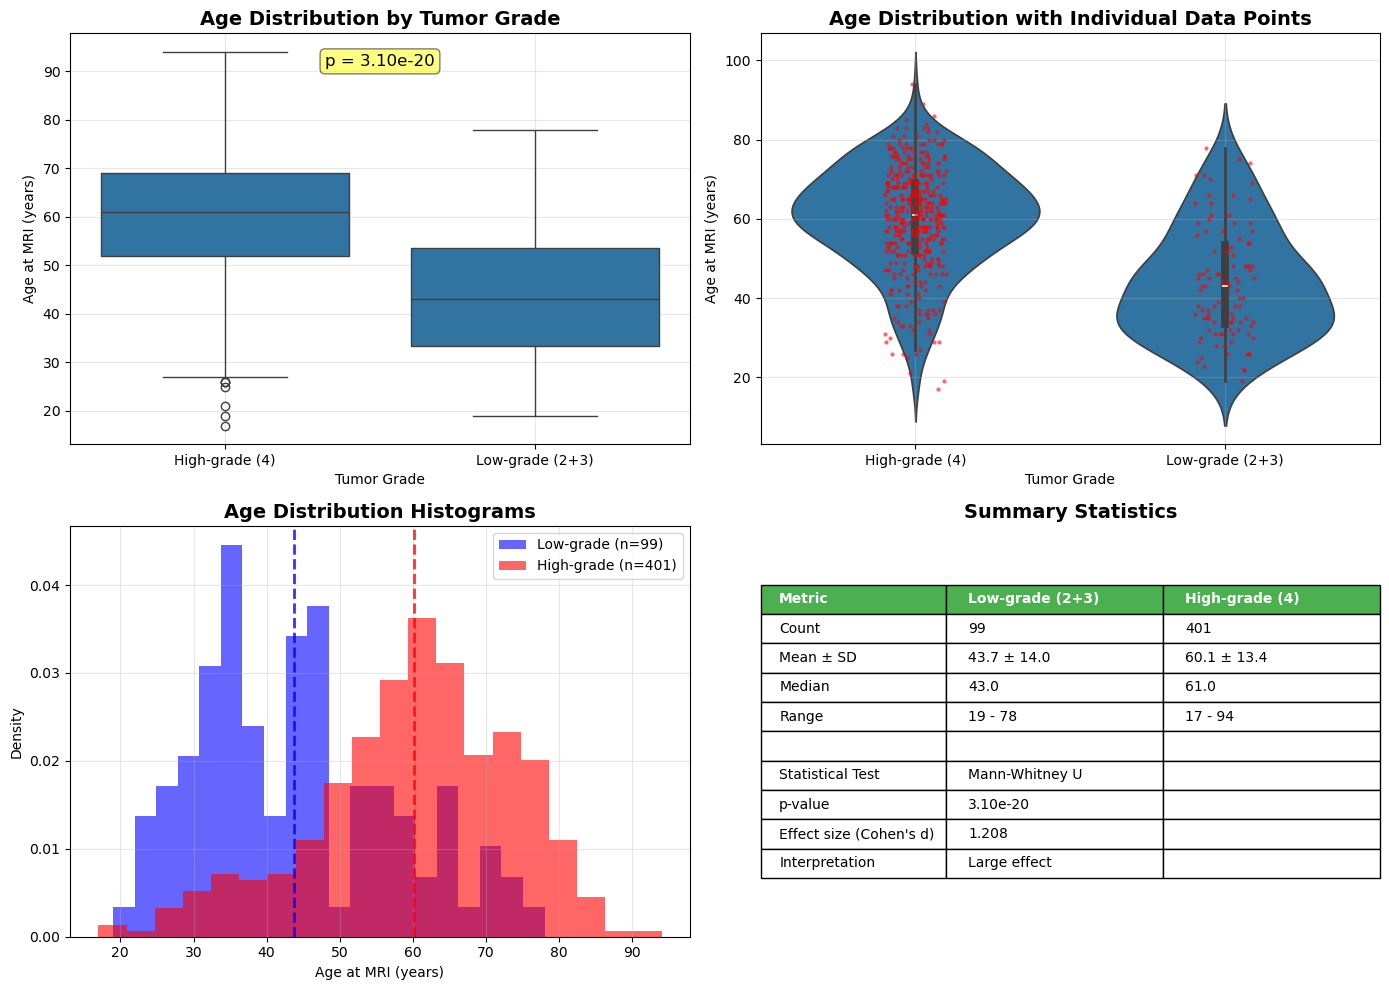


AGE GROUP ANALYSIS
Age group distribution by tumor grade (column percentages):
grade_group  High-grade (4)  Low-grade (2+3)
age_group                                   
40-59 years           0.339            0.394
<40 years             0.090            0.455
≥60 years             0.571            0.152

Age group counts by tumor grade:
grade_group  High-grade (4)  Low-grade (2+3)
age_group                                   
40-59 years             136               39
<40 years                36               45
≥60 years               229               15

Chi-square test for age group association:
Chi-square statistic: 94.534
p-value: 2.97e-21
Degrees of freedom: 2


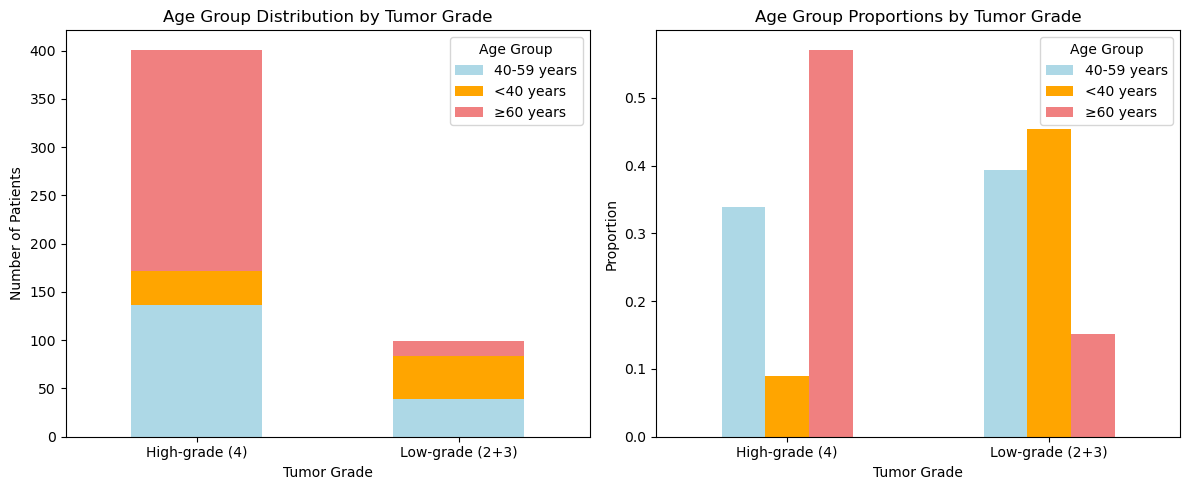


Key findings:
1. High-grade tumors occur in significantly older patients
2. Mean age difference: 16.4 years
3. Effect size is large
4. This age difference is a major confounder in tumor grade comparisons

Files generated:
- age_by_tumor_grade.png
- age_groups_by_tumor_grade.png


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
print("Loading patient data...")
df = pd.read_csv('patient_level_comprehensive_features.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total patients: {len(df)}")

# Create binary grade classification
df['grade_group'] = df['who_grade'].apply(lambda x: 'Low-grade (2+3)' if x in [2, 3] else 'High-grade (4)')

# Remove any missing age values
df_clean = df.dropna(subset=['age_at_mri'])

print(f"\nGrade distribution:")
print(df_clean['grade_group'].value_counts())

print(f"\nAge statistics by grade:")
age_stats = df_clean.groupby('grade_group')['age_at_mri'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
print(age_stats.round(1))

# Statistical test
low_grade_ages = df_clean[df_clean['grade_group'] == 'Low-grade (2+3)']['age_at_mri']
high_grade_ages = df_clean[df_clean['grade_group'] == 'High-grade (4)']['age_at_mri']

# Mann-Whitney U test (non-parametric)
statistic, p_value = stats.mannwhitneyu(low_grade_ages, high_grade_ages, alternative='two-sided')

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(low_grade_ages) - 1) * low_grade_ages.var() + 
                      (len(high_grade_ages) - 1) * high_grade_ages.var()) / 
                     (len(low_grade_ages) + len(high_grade_ages) - 2))
cohens_d = (high_grade_ages.mean() - low_grade_ages.mean()) / pooled_std

print(f"\nStatistical comparison:")
print(f"Low-grade mean age: {low_grade_ages.mean():.1f} ± {low_grade_ages.std():.1f} years")
print(f"High-grade mean age: {high_grade_ages.mean():.1f} ± {high_grade_ages.std():.1f} years")
print(f"Difference: {high_grade_ages.mean() - low_grade_ages.mean():.1f} years")
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value:.2e}")
print(f"Cohen's d: {cohens_d:.3f}")
print(f"Significance: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Box plot
sns.boxplot(data=df_clean, x='grade_group', y='age_at_mri', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Tumor Grade', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Tumor Grade')
axes[0,0].set_ylabel('Age at MRI (years)')
axes[0,0].grid(True, alpha=0.3)

# Add statistical annotation
axes[0,0].text(0.5, 0.95, f'p = {p_value:.2e}', transform=axes[0,0].transAxes, 
               ha='center', va='top', fontsize=12, 
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 2. Violin plot with individual points
sns.violinplot(data=df_clean, x='grade_group', y='age_at_mri', ax=axes[0,1])
sns.stripplot(data=df_clean, x='grade_group', y='age_at_mri', ax=axes[0,1], 
              color='red', alpha=0.6, size=3)
axes[0,1].set_title('Age Distribution with Individual Data Points', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Tumor Grade')
axes[0,1].set_ylabel('Age at MRI (years)')
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram comparison
axes[1,0].hist(low_grade_ages, bins=20, alpha=0.6, label=f'Low-grade (n={len(low_grade_ages)})', 
               color='blue', density=True)
axes[1,0].hist(high_grade_ages, bins=20, alpha=0.6, label=f'High-grade (n={len(high_grade_ages)})', 
               color='red', density=True)
axes[1,0].set_xlabel('Age at MRI (years)')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Age Distribution Histograms', fontsize=14, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Add mean lines
axes[1,0].axvline(low_grade_ages.mean(), color='blue', linestyle='--', linewidth=2, alpha=0.8)
axes[1,0].axvline(high_grade_ages.mean(), color='red', linestyle='--', linewidth=2, alpha=0.8)

# 4. Summary statistics table
table_data = [
    ['Metric', 'Low-grade (2+3)', 'High-grade (4)'],
    ['Count', f'{len(low_grade_ages)}', f'{len(high_grade_ages)}'],
    ['Mean ± SD', f'{low_grade_ages.mean():.1f} ± {low_grade_ages.std():.1f}', 
     f'{high_grade_ages.mean():.1f} ± {high_grade_ages.std():.1f}'],
    ['Median', f'{low_grade_ages.median():.1f}', f'{high_grade_ages.median():.1f}'],
    ['Range', f'{low_grade_ages.min():.0f} - {low_grade_ages.max():.0f}', 
     f'{high_grade_ages.min():.0f} - {high_grade_ages.max():.0f}'],
    ['', '', ''],
    ['Statistical Test', 'Mann-Whitney U', ''],
    ['p-value', f'{p_value:.2e}', ''],
    ['Effect size (Cohen\'s d)', f'{cohens_d:.3f}', ''],
    ['Interpretation', 'Large effect' if abs(cohens_d) > 0.8 else 'Medium effect' if abs(cohens_d) > 0.5 else 'Small effect', '']
]

axes[1,1].axis('tight')
axes[1,1].axis('off')
table = axes[1,1].table(cellText=table_data, cellLoc='left', loc='center',
                        colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style the header row
for i in range(3):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

axes[1,1].set_title('Summary Statistics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('age_by_tumor_grade.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional age group analysis
print(f"\n" + "="*60)
print("AGE GROUP ANALYSIS")
print("="*60)

# Define age groups
def categorize_age(age):
    if age < 40:
        return '<40 years'
    elif age < 60:
        return '40-59 years'
    else:
        return '≥60 years'

df_clean['age_group'] = df_clean['age_at_mri'].apply(categorize_age)

# Cross-tabulation
age_grade_crosstab = pd.crosstab(df_clean['age_group'], df_clean['grade_group'], normalize='columns')
print("Age group distribution by tumor grade (column percentages):")
print(age_grade_crosstab.round(3))

age_grade_counts = pd.crosstab(df_clean['age_group'], df_clean['grade_group'])
print(f"\nAge group counts by tumor grade:")
print(age_grade_counts)

# Chi-square test for age group association
chi2, p_chi2, dof, expected = stats.chi2_contingency(age_grade_counts)
print(f"\nChi-square test for age group association:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_chi2:.2e}")
print(f"Degrees of freedom: {dof}")

# Create age group visualization
plt.figure(figsize=(12, 5))

# Stacked bar plot
plt.subplot(1, 2, 1)
age_grade_counts.T.plot(kind='bar', stacked=True, ax=plt.gca(), 
                        color=['lightblue', 'orange', 'lightcoral'])
plt.title('Age Group Distribution by Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('Number of Patients')
plt.legend(title='Age Group')
plt.xticks(rotation=0)

# Percentage bar plot
plt.subplot(1, 2, 2)
age_grade_crosstab.T.plot(kind='bar', ax=plt.gca(), 
                          color=['lightblue', 'orange', 'lightcoral'])
plt.title('Age Group Proportions by Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('Proportion')
plt.legend(title='Age Group')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('age_groups_by_tumor_grade.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKey findings:")
print(f"1. High-grade tumors occur in significantly older patients")
print(f"2. Mean age difference: {high_grade_ages.mean() - low_grade_ages.mean():.1f} years")
print(f"3. Effect size is {'large' if abs(cohens_d) > 0.8 else 'medium' if abs(cohens_d) > 0.5 else 'small'}")
print(f"4. This age difference is a major confounder in tumor grade comparisons")

print(f"\nFiles generated:")
print(f"- age_by_tumor_grade.png")
print(f"- age_groups_by_tumor_grade.png")

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.stats
from scipy.stats import skew, kurtosis
from sklearn.feature_extraction import image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def extract_patient_level_features(patient_id, base_path='../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/'):
    """Extract comprehensive patient-level features from brain imaging"""
    
    patient_id_padded = patient_id.split('-')[-1].zfill(4)
    
    # File paths
    fa_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                         f'UCSF-PDGM-{patient_id_padded}_DTI_eddy_FA.nii.gz')
    tumor_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_tumor_segmentation.nii.gz')
    brain_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_brain_segmentation.nii.gz')
    
    # Check if files exist
    if not all(os.path.exists(p) for p in [fa_path, tumor_path, brain_path]):
        return None
    
    try:
        # Load data
        fa_data = nib.load(fa_path).get_fdata()
        tumor_mask = nib.load(tumor_path).get_fdata()
        brain_mask = nib.load(brain_path).get_fdata()
        
        # Get brain-only voxels (excluding tumor)
        brain_indices = np.where(brain_mask > 0.5)
        tumor_binary = tumor_mask > 0
        
        # Create brain-not-tumor mask
        brain_not_tumor_mask = np.zeros_like(brain_mask, dtype=bool)
        for i in range(len(brain_indices[0])):
            x, y, z = brain_indices[0][i], brain_indices[1][i], brain_indices[2][i]
            if not tumor_binary[x, y, z]:
                brain_not_tumor_mask[x, y, z] = True
        
        brain_fa_values = fa_data[brain_not_tumor_mask]
        
        if len(brain_fa_values) == 0:
            return None
        
        # Compute tumor center
        tumor_coords = np.where(tumor_mask > 0)
        if len(tumor_coords[0]) == 0:
            return None
            
        tumor_center = np.array([np.mean(tumor_coords[0]), 
                                np.mean(tumor_coords[1]), 
                                np.mean(tumor_coords[2])])
        
        features = {}
        
        # Basic intensity statistics
        features['fa_mean'] = np.mean(brain_fa_values)
        features['fa_std'] = np.std(brain_fa_values)
        features['fa_min'] = np.min(brain_fa_values)
        features['fa_max'] = np.max(brain_fa_values)
        features['fa_median'] = np.median(brain_fa_values)
        
        # Percentiles
        percentiles = [5, 10, 25, 75, 90, 95]
        for p in percentiles:
            features[f'fa_p{p}'] = np.percentile(brain_fa_values, p)
        
        # Higher order moments
        features['fa_skewness'] = skew(brain_fa_values)
        features['fa_kurtosis'] = kurtosis(brain_fa_values)
        
        # Histogram features
        hist, _ = np.histogram(brain_fa_values, bins=50, density=True)
        hist = hist[hist > 0]  # Remove zero bins for entropy
        features['fa_entropy'] = -np.sum(hist * np.log(hist + 1e-10))
        
        # Peak location (mode approximation)
        hist_counts, bin_edges = np.histogram(brain_fa_values, bins=50)
        peak_bin = np.argmax(hist_counts)
        features['fa_mode'] = (bin_edges[peak_bin] + bin_edges[peak_bin + 1]) / 2
        
        # Distance-based features (shells around tumor)
        brain_coords = np.where(brain_not_tumor_mask)
        distances = np.sqrt(np.sum((np.array([brain_coords[0], brain_coords[1], brain_coords[2]]).T - tumor_center)**2, axis=1))
        
        # Define distance shells
        shells = [(0, 10), (10, 20), (20, 30), (30, float('inf'))]
        for i, (min_dist, max_dist) in enumerate(shells):
            shell_mask = (distances >= min_dist) & (distances < max_dist) if max_dist != float('inf') else (distances >= min_dist)
            if np.sum(shell_mask) > 10:  # Minimum voxels for reliable stats
                shell_fa = fa_data[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                features[f'shell_{i}_fa_mean'] = np.mean(shell_fa)
                features[f'shell_{i}_fa_std'] = np.std(shell_fa)
                features[f'shell_{i}_fa_median'] = np.median(shell_fa)
                features[f'shell_{i}_voxel_count'] = len(shell_fa)
            else:
                features[f'shell_{i}_fa_mean'] = np.nan
                features[f'shell_{i}_fa_std'] = np.nan
                features[f'shell_{i}_fa_median'] = np.nan
                features[f'shell_{i}_voxel_count'] = 0
        
        # Hemispheric asymmetry
        mid_x = fa_data.shape[0] // 2
        left_hemisphere = brain_not_tumor_mask.copy()
        left_hemisphere[mid_x:, :, :] = False
        right_hemisphere = brain_not_tumor_mask.copy()
        right_hemisphere[:mid_x, :, :] = False
        
        left_fa = fa_data[left_hemisphere]
        right_fa = fa_data[right_hemisphere]
        
        if len(left_fa) > 0 and len(right_fa) > 0:
            features['hemispheric_asymmetry_mean'] = np.mean(left_fa) - np.mean(right_fa)
            features['hemispheric_asymmetry_std'] = np.std(left_fa) - np.std(right_fa)
            features['left_hemisphere_fa_mean'] = np.mean(left_fa)
            features['right_hemisphere_fa_mean'] = np.mean(right_fa)
        else:
            features['hemispheric_asymmetry_mean'] = np.nan
            features['hemispheric_asymmetry_std'] = np.nan
            features['left_hemisphere_fa_mean'] = np.nan
            features['right_hemisphere_fa_mean'] = np.nan
        
        # Superior/inferior asymmetry
        mid_z = fa_data.shape[2] // 2
        superior = brain_not_tumor_mask.copy()
        superior[:, :, :mid_z] = False
        inferior = brain_not_tumor_mask.copy()
        inferior[:, :, mid_z:] = False
        
        sup_fa = fa_data[superior]
        inf_fa = fa_data[inferior]
        
        if len(sup_fa) > 0 and len(inf_fa) > 0:
            features['superior_inferior_asymmetry'] = np.mean(sup_fa) - np.mean(inf_fa)
            features['superior_fa_mean'] = np.mean(sup_fa)
            features['inferior_fa_mean'] = np.mean(inf_fa)
        else:
            features['superior_inferior_asymmetry'] = np.nan
            features['superior_fa_mean'] = np.nan
            features['inferior_fa_mean'] = np.nan
        
        # Gradient features around tumor
        # Compute gradients for the whole brain
        grad_x = np.gradient(fa_data, axis=0)
        grad_y = np.gradient(fa_data, axis=1)
        grad_z = np.gradient(fa_data, axis=2)
        grad_magnitude = np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        
        # Gradient statistics in brain (excluding tumor)
        brain_gradients = grad_magnitude[brain_not_tumor_mask]
        features['gradient_mean'] = np.mean(brain_gradients)
        features['gradient_std'] = np.std(brain_gradients)
        features['gradient_median'] = np.median(brain_gradients)
        features['gradient_p90'] = np.percentile(brain_gradients, 90)
        
        # Gradient statistics in shells around tumor
        for i, (min_dist, max_dist) in enumerate(shells):
            shell_mask = (distances >= min_dist) & (distances < max_dist) if max_dist != float('inf') else (distances >= min_dist)
            if np.sum(shell_mask) > 10:
                shell_gradients = grad_magnitude[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                features[f'shell_{i}_gradient_mean'] = np.mean(shell_gradients)
                features[f'shell_{i}_gradient_std'] = np.std(shell_gradients)
            else:
                features[f'shell_{i}_gradient_mean'] = np.nan
                features[f'shell_{i}_gradient_std'] = np.nan
        
        # Tumor-specific features
        features['tumor_volume'] = np.sum(tumor_binary)
        features['brain_volume'] = np.sum(brain_mask > 0.5)
        features['tumor_brain_ratio'] = features['tumor_volume'] / features['brain_volume']
        
        # Tumor center normalized coordinates
        features['tumor_center_x_norm'] = tumor_center[0] / fa_data.shape[0]
        features['tumor_center_y_norm'] = tumor_center[1] / fa_data.shape[1]
        features['tumor_center_z_norm'] = tumor_center[2] / fa_data.shape[2]
        
        # Edge density (measure of heterogeneity)
        # Use Canny-like edge detection
        brain_fa_2d = fa_data[:, :, int(tumor_center[2])]  # Axial slice through tumor center
        brain_mask_2d = brain_mask[:, :, int(tumor_center[2])] > 0.5
        
        if np.sum(brain_mask_2d) > 100:  # Minimum area
            from scipy import ndimage
            edges = ndimage.sobel(brain_fa_2d)
            edge_density = np.sum(edges[brain_mask_2d] > np.percentile(edges[brain_mask_2d], 95)) / np.sum(brain_mask_2d)
            features['edge_density'] = edge_density
        else:
            features['edge_density'] = np.nan
        
        return features
        
    except Exception as e:
        print(f"Error processing {patient_id}: {e}")
        return None

# Load metadata
print("Loading metadata...")
df = pd.read_csv('PDGM/UCSF-PDGM-metadata_v5.csv')
print(f"Total patients in metadata: {len(df)}")

# Process all patients
print("\nProcessing all patients for patient-level features...")
patient_features_list = []

processed_count = 0
failed_count = 0

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing patients"):
    patient_id = row['ID']
    who_grade = row['WHO CNS Grade']
    
    if pd.isna(who_grade):
        continue
    
    # Extract imaging features
    imaging_features = extract_patient_level_features(patient_id)
    
    if imaging_features is not None:
        # Combine with clinical data
        patient_data = {
            'patient_id': patient_id,
            'who_grade': int(who_grade),
            'age_at_mri': row['Age at MRI'],
            'sex': row['Sex'],
            'overall_survival_days': row['OS'],
            'mgmt_status': row['MGMT status'],
            'mgmt_index': row['MGMT index'],
            '1p19q': row['1p/19q'],
            'idh_status': row['IDH'],
            'eor': row['EOR']
        }
        
        # Add imaging features
        patient_data.update(imaging_features)
        patient_features_list.append(patient_data)
        processed_count += 1
    else:
        failed_count += 1

print(f"\nSuccessfully processed: {processed_count} patients")
print(f"Failed: {failed_count} patients")

# Convert to DataFrame
patient_df = pd.DataFrame(patient_features_list)

print(f"\nFinal dataset shape: {patient_df.shape}")
print(f"Features per patient: {patient_df.shape[1] - 10}")  # Subtract clinical variables

# Save to CSV
csv_filename = 'patient_level_comprehensive_features.csv'
patient_df.to_csv(csv_filename, index=False)
print(f"Saved comprehensive patient features to {csv_filename}")
print(f"File size: {os.path.getsize(csv_filename) / 1024 / 1024:.2f} MB")

# Display sample and feature summary
print("\nSample of the data:")
print(patient_df[['patient_id', 'who_grade', 'fa_mean', 'fa_std', 'tumor_volume', 'shell_0_fa_mean']].head())

print(f"\nGrade distribution:")
print(patient_df['who_grade'].value_counts().sort_index())

# Feature categories summary
imaging_features = [col for col in patient_df.columns if col not in 
                   ['patient_id', 'who_grade', 'age_at_mri', 'sex', 'overall_survival_days', 
                    'mgmt_status', 'mgmt_index', '1p19q', 'idh_status', 'eor']]

print(f"\nImaging features extracted: {len(imaging_features)}")
print("Feature categories:")
print(f"- Basic FA statistics: {len([f for f in imaging_features if f.startswith('fa_') and 'shell' not in f and 'hemisphere' not in f])}")
print(f"- Distance shell features: {len([f for f in imaging_features if 'shell_' in f])}")
print(f"- Asymmetry features: {len([f for f in imaging_features if 'hemisphere' in f or 'asymmetry' in f])}")
print(f"- Gradient features: {len([f for f in imaging_features if 'gradient' in f])}")
print(f"- Tumor features: {len([f for f in imaging_features if 'tumor' in f])}")
print(f"- Other: {len([f for f in imaging_features if not any(x in f for x in ['fa_', 'shell_', 'hemisphere', 'asymmetry', 'gradient', 'tumor'])])}")

# Check for missing values
print(f"\nMissing values per feature:")
missing_counts = patient_df.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
if len(missing_features) > 0:
    print(missing_features.head(10))
else:
    print("No missing values found!")

print(f"\nDataset ready for machine learning with {processed_count} patients and {len(imaging_features)} imaging features.")

# Display IDH status distribution
print(f"\nIDH status distribution:")
print(patient_df['idh_status'].value_counts())

# Show molecular marker combinations
print(f"\nMolecular marker combinations:")
print("IDH status by WHO grade:")
idh_by_grade = pd.crosstab(patient_df['who_grade'], patient_df['idh_status'], normalize='index')
print(idh_by_grade.round(3))

Loading metadata...
Total patients in metadata: 501

Processing all patients for patient-level features...


Processing patients: 100%|██████████| 501/501 [51:38<00:00,  6.18s/it]  

Error processing UCSF-PDGM-541: Empty file: '../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/UCSF-PDGM-0541_nifti/UCSF-PDGM-0541_tumor_segmentation.nii.gz'

Successfully processed: 500 patients
Failed: 1 patients

Final dataset shape: (500, 67)
Features per patient: 57


Saved comprehensive patient features to patient_level_comprehensive_features.csv
File size: 0.49 MB

Sample of the data:
      patient_id  who_grade   fa_mean    fa_std  tumor_volume  shell_0_fa_mean
0  UCSF-PDGM-004          4  0.253438  0.163584         41919              NaN
1  UCSF-PDGM-005          4  0.225728  0.150805         28419         0.152908
2  UCSF-PDGM-007          4  0.245633  0.146553        225535              NaN
3  UCSF-PDGM-008          4  0.270115  0.155586        168611              NaN
4  UCSF-PDGM-009          4  0.200340  0.136351        119424              NaN

Grade distribution:
who_grade
2     56
3     43
4    401
Name: count, dtype: int64

Imaging features extracted: 57
Feature categories:
- Basic FA statistics: 15
- Distance shell features: 24
- Asymmetry features: 5
- Gradient features: 12
- Tumor features: 5
- Other: 2

Missing values per feature:
overall_survival_days      1
eor                        1
shell_0_fa_mean          345
shell_0_fa_std    

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.stats
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cdist
from scipy import ndimage
from sklearn.feature_extraction import image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def extract_patient_level_features(patient_id, base_path='../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/'):
    """Extract comprehensive patient-level features from brain imaging"""
    
    patient_id_padded = patient_id.split('-')[-1].zfill(4)
    
    # File paths
    fa_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                         f'UCSF-PDGM-{patient_id_padded}_DTI_eddy_FA.nii.gz')
    tumor_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_tumor_segmentation.nii.gz')
    brain_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_brain_segmentation.nii.gz')
    
    # Check if files exist
    if not all(os.path.exists(p) for p in [fa_path, tumor_path, brain_path]):
        return None
    
    try:
        # Load data
        fa_data = nib.load(fa_path).get_fdata()
        tumor_mask = nib.load(tumor_path).get_fdata()
        brain_mask = nib.load(brain_path).get_fdata()
        
        # Get brain-only voxels (excluding tumor)
        brain_indices = np.where(brain_mask > 0.5)
        tumor_binary = tumor_mask > 0
        
        # Create brain-not-tumor mask
        brain_not_tumor_mask = np.zeros_like(brain_mask, dtype=bool)
        for i in range(len(brain_indices[0])):
            x, y, z = brain_indices[0][i], brain_indices[1][i], brain_indices[2][i]
            if not tumor_binary[x, y, z]:
                brain_not_tumor_mask[x, y, z] = True
        
        brain_fa_values = fa_data[brain_not_tumor_mask]
        
        if len(brain_fa_values) == 0:
            return None
        
        # Compute tumor center
        tumor_coords = np.where(tumor_mask > 0)
        if len(tumor_coords[0]) == 0:
            return None
            
        tumor_center = np.array([np.mean(tumor_coords[0]), 
                                np.mean(tumor_coords[1]), 
                                np.mean(tumor_coords[2])])
        
        features = {}
        
        # Basic intensity statistics
        features['fa_mean'] = np.mean(brain_fa_values)
        features['fa_std'] = np.std(brain_fa_values)
        features['fa_min'] = np.min(brain_fa_values)
        features['fa_max'] = np.max(brain_fa_values)
        features['fa_median'] = np.median(brain_fa_values)
        
        # Percentiles
        percentiles = [5, 10, 25, 75, 90, 95]
        for p in percentiles:
            features[f'fa_p{p}'] = np.percentile(brain_fa_values, p)
        
        # Higher order moments
        features['fa_skewness'] = skew(brain_fa_values)
        features['fa_kurtosis'] = kurtosis(brain_fa_values)
        
        # Histogram features
        hist, _ = np.histogram(brain_fa_values, bins=50, density=True)
        hist = hist[hist > 0]  # Remove zero bins for entropy
        features['fa_entropy'] = -np.sum(hist * np.log(hist + 1e-10))
        
        # Peak location (mode approximation)
        hist_counts, bin_edges = np.histogram(brain_fa_values, bins=50)
        peak_bin = np.argmax(hist_counts)
        features['fa_mode'] = (bin_edges[peak_bin] + bin_edges[peak_bin + 1]) / 2
        
        # Distance-based features (shells around tumor) - FIXED VERSION
        brain_coords = np.where(brain_not_tumor_mask)
        distances = np.sqrt(np.sum((np.array([brain_coords[0], brain_coords[1], brain_coords[2]]).T - tumor_center)**2, axis=1))
        
        # Adjusted shell boundaries (start further from tumor center to avoid empty shells)
        shells = [(5, 15), (15, 25), (25, 40), (40, float('inf'))]
        
        # Tumor boundary-based analysis (memory-efficient version)
        tumor_dilated = ndimage.binary_dilation(tumor_binary, iterations=1)
        tumor_boundary = tumor_dilated & ~tumor_binary
        
        # Get distances from tumor boundary using distance transform (much faster)
        if np.sum(tumor_boundary) > 0:
            # Use distance transform for efficient boundary distance calculation
            boundary_distances_3d = ndimage.distance_transform_edt(~tumor_boundary)
            boundary_distances = boundary_distances_3d[brain_coords]
            
            # Boundary-based shells (distance from tumor edge)
            boundary_shells = [(0, 5), (5, 10), (10, 20), (20, float('inf'))]
            
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                voxel_count = np.sum(shell_mask)
                
                if voxel_count > 10:
                    shell_fa = fa_data[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'boundary_shell_{i}_fa_mean'] = np.mean(shell_fa)
                    features[f'boundary_shell_{i}_fa_std'] = np.std(shell_fa)
                    features[f'boundary_shell_{i}_fa_median'] = np.median(shell_fa)
                    features[f'boundary_shell_{i}_voxel_count'] = len(shell_fa)
                else:
                    features[f'boundary_shell_{i}_fa_mean'] = np.nan
                    features[f'boundary_shell_{i}_fa_std'] = np.nan
                    features[f'boundary_shell_{i}_fa_median'] = np.nan
                    features[f'boundary_shell_{i}_voxel_count'] = 0
        else:
            # Fallback if no boundary found
            for i in range(4):
                features[f'boundary_shell_{i}_fa_mean'] = np.nan
                features[f'boundary_shell_{i}_fa_std'] = np.nan
                features[f'boundary_shell_{i}_fa_median'] = np.nan
                features[f'boundary_shell_{i}_voxel_count'] = 0
        
        # Center-based shells with adjusted boundaries
        for i, (min_dist, max_dist) in enumerate(shells):
            shell_mask = (distances >= min_dist) & (distances < max_dist) if max_dist != float('inf') else (distances >= min_dist)
            voxel_count = np.sum(shell_mask)
            
            if voxel_count > 10:
                shell_fa = fa_data[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                features[f'shell_{i}_fa_mean'] = np.mean(shell_fa)
                features[f'shell_{i}_fa_std'] = np.std(shell_fa)
                features[f'shell_{i}_fa_median'] = np.median(shell_fa)
                features[f'shell_{i}_voxel_count'] = len(shell_fa)
            else:
                features[f'shell_{i}_fa_mean'] = np.nan
                features[f'shell_{i}_fa_std'] = np.nan
                features[f'shell_{i}_fa_median'] = np.nan
                features[f'shell_{i}_voxel_count'] = 0
        
        # Hemispheric asymmetry
        mid_x = fa_data.shape[0] // 2
        left_hemisphere = brain_not_tumor_mask.copy()
        left_hemisphere[mid_x:, :, :] = False
        right_hemisphere = brain_not_tumor_mask.copy()
        right_hemisphere[:mid_x, :, :] = False
        
        left_fa = fa_data[left_hemisphere]
        right_fa = fa_data[right_hemisphere]
        
        if len(left_fa) > 0 and len(right_fa) > 0:
            features['hemispheric_asymmetry_mean'] = np.mean(left_fa) - np.mean(right_fa)
            features['hemispheric_asymmetry_std'] = np.std(left_fa) - np.std(right_fa)
            features['left_hemisphere_fa_mean'] = np.mean(left_fa)
            features['right_hemisphere_fa_mean'] = np.mean(right_fa)
        else:
            features['hemispheric_asymmetry_mean'] = np.nan
            features['hemispheric_asymmetry_std'] = np.nan
            features['left_hemisphere_fa_mean'] = np.nan
            features['right_hemisphere_fa_mean'] = np.nan
        
        # Superior/inferior asymmetry
        mid_z = fa_data.shape[2] // 2
        superior = brain_not_tumor_mask.copy()
        superior[:, :, :mid_z] = False
        inferior = brain_not_tumor_mask.copy()
        inferior[:, :, mid_z:] = False
        
        sup_fa = fa_data[superior]
        inf_fa = fa_data[inferior]
        
        if len(sup_fa) > 0 and len(inf_fa) > 0:
            features['superior_inferior_asymmetry'] = np.mean(sup_fa) - np.mean(inf_fa)
            features['superior_fa_mean'] = np.mean(sup_fa)
            features['inferior_fa_mean'] = np.mean(inf_fa)
        else:
            features['superior_inferior_asymmetry'] = np.nan
            features['superior_fa_mean'] = np.nan
            features['inferior_fa_mean'] = np.nan
        
        # Gradient features around tumor
        # Compute gradients for the whole brain
        grad_x = np.gradient(fa_data, axis=0)
        grad_y = np.gradient(fa_data, axis=1)
        grad_z = np.gradient(fa_data, axis=2)
        grad_magnitude = np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        
        # Gradient statistics in brain (excluding tumor)
        brain_gradients = grad_magnitude[brain_not_tumor_mask]
        features['gradient_mean'] = np.mean(brain_gradients)
        features['gradient_std'] = np.std(brain_gradients)
        features['gradient_median'] = np.median(brain_gradients)
        features['gradient_p90'] = np.percentile(brain_gradients, 90)
        
        # Gradient statistics in shells around tumor (using adjusted shells)
        for i, (min_dist, max_dist) in enumerate(shells):
            shell_mask = (distances >= min_dist) & (distances < max_dist) if max_dist != float('inf') else (distances >= min_dist)
            if np.sum(shell_mask) > 10:
                shell_gradients = grad_magnitude[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                features[f'shell_{i}_gradient_mean'] = np.mean(shell_gradients)
                features[f'shell_{i}_gradient_std'] = np.std(shell_gradients)
            else:
                features[f'shell_{i}_gradient_mean'] = np.nan
                features[f'shell_{i}_gradient_std'] = np.nan
        
        # Boundary-based gradient features
        if np.sum(tumor_boundary) > 0:
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                if np.sum(shell_mask) > 10:
                    shell_gradients = grad_magnitude[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'boundary_shell_{i}_gradient_mean'] = np.mean(shell_gradients)
                    features[f'boundary_shell_{i}_gradient_std'] = np.std(shell_gradients)
                else:
                    features[f'boundary_shell_{i}_gradient_mean'] = np.nan
                    features[f'boundary_shell_{i}_gradient_std'] = np.nan
        else:
            for i in range(4):
                features[f'boundary_shell_{i}_gradient_mean'] = np.nan
                features[f'boundary_shell_{i}_gradient_std'] = np.nan
        
        # Tumor-specific features
        features['tumor_volume'] = np.sum(tumor_binary)
        features['brain_volume'] = np.sum(brain_mask > 0.5)
        features['tumor_brain_ratio'] = features['tumor_volume'] / features['brain_volume']
        
        # Tumor center normalized coordinates
        features['tumor_center_x_norm'] = tumor_center[0] / fa_data.shape[0]
        features['tumor_center_y_norm'] = tumor_center[1] / fa_data.shape[1]
        features['tumor_center_z_norm'] = tumor_center[2] / fa_data.shape[2]
        
        # Edge density (measure of heterogeneity)
        # Use Canny-like edge detection
        brain_fa_2d = fa_data[:, :, int(tumor_center[2])]  # Axial slice through tumor center
        brain_mask_2d = brain_mask[:, :, int(tumor_center[2])] > 0.5
        
        if np.sum(brain_mask_2d) > 100:  # Minimum area
            edges = ndimage.sobel(brain_fa_2d)
            edge_density = np.sum(edges[brain_mask_2d] > np.percentile(edges[brain_mask_2d], 95)) / np.sum(brain_mask_2d)
            features['edge_density'] = edge_density
        else:
            features['edge_density'] = np.nan
        
        return features
        
    except Exception as e:
        print(f"Error processing {patient_id}: {e}")
        return None

# Load metadata
print("Loading metadata...")
df = pd.read_csv('PDGM/UCSF-PDGM-metadata_v5.csv')
print(f"Total patients in metadata: {len(df)}")

# Process all patients
print("\nProcessing all patients for patient-level features...")
patient_features_list = []

processed_count = 0
failed_count = 0

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing patients"):
    patient_id = row['ID']
    who_grade = row['WHO CNS Grade']
    
    if pd.isna(who_grade):
        continue
    
    # Extract imaging features
    imaging_features = extract_patient_level_features(patient_id)
    
    if imaging_features is not None:
        # Combine with clinical data
        patient_data = {
            'patient_id': patient_id,
            'who_grade': int(who_grade),
            'age_at_mri': row['Age at MRI'],
            'sex': row['Sex'],
            'overall_survival_days': row['OS'],
            'mgmt_status': row['MGMT status'],
            'mgmt_index': row['MGMT index'],
            '1p19q': row['1p/19q'],
            'idh_status': row['IDH'],
            'eor': row['EOR']
        }
        
        # Add imaging features
        patient_data.update(imaging_features)
        patient_features_list.append(patient_data)
        processed_count += 1
    else:
        failed_count += 1

print(f"\nSuccessfully processed: {processed_count} patients")
print(f"Failed: {failed_count} patients")

# Convert to DataFrame
patient_df = pd.DataFrame(patient_features_list)

print(f"\nFinal dataset shape: {patient_df.shape}")
print(f"Features per patient: {patient_df.shape[1] - 10}")  # Subtract clinical variables

# Save to CSV
csv_filename = 'patient_level_comprehensive_features_fixed.csv'
patient_df.to_csv(csv_filename, index=False)
print(f"Saved comprehensive patient features to {csv_filename}")
print(f"File size: {os.path.getsize(csv_filename) / 1024 / 1024:.2f} MB")

# Display sample and feature summary
print("\nSample of the data:")
sample_cols = ['patient_id', 'who_grade', 'fa_mean', 'fa_std', 'tumor_volume']
if 'shell_0_fa_mean' in patient_df.columns:
    sample_cols.append('shell_0_fa_mean')
if 'boundary_shell_0_fa_mean' in patient_df.columns:
    sample_cols.append('boundary_shell_0_fa_mean')
print(patient_df[sample_cols].head())

print(f"\nGrade distribution:")
print(patient_df['who_grade'].value_counts().sort_index())

# Feature categories summary
imaging_features = [col for col in patient_df.columns if col not in 
                   ['patient_id', 'who_grade', 'age_at_mri', 'sex', 'overall_survival_days', 
                    'mgmt_status', 'mgmt_index', '1p19q', 'idh_status', 'eor']]

print(f"\nImaging features extracted: {len(imaging_features)}")
print("Feature categories:")
print(f"- Basic FA statistics: {len([f for f in imaging_features if f.startswith('fa_') and 'shell' not in f and 'hemisphere' not in f])}")
print(f"- Distance shell features: {len([f for f in imaging_features if 'shell_' in f and 'boundary' not in f])}")
print(f"- Boundary shell features: {len([f for f in imaging_features if 'boundary_shell' in f])}")
print(f"- Asymmetry features: {len([f for f in imaging_features if 'hemisphere' in f or 'asymmetry' in f])}")
print(f"- Gradient features: {len([f for f in imaging_features if 'gradient' in f])}")
print(f"- Tumor features: {len([f for f in imaging_features if 'tumor' in f])}")
print(f"- Other: {len([f for f in imaging_features if not any(x in f for x in ['fa_', 'shell_', 'hemisphere', 'asymmetry', 'gradient', 'tumor', 'boundary'])])}")

# Check for missing values
print(f"\nMissing values per feature:")
missing_counts = patient_df.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
if len(missing_features) > 0:
    print(missing_features.head(15))  # Show more to see boundary features
else:
    print("No missing values found!")

print(f"\nDataset ready for machine learning with {processed_count} patients and {len(imaging_features)} imaging features.")

# Display IDH status distribution
print(f"\nIDH status distribution:")
print(patient_df['idh_status'].value_counts())

# Show molecular marker combinations
print(f"\nMolecular marker combinations:")
print("IDH status by WHO grade:")
idh_by_grade = pd.crosstab(patient_df['who_grade'], patient_df['idh_status'], normalize='index')
print(idh_by_grade.round(3))

Loading metadata...
Total patients in metadata: 501

Processing all patients for patient-level features...


Processing patients: 100%|██████████| 501/501 [32:03<00:00,  3.84s/it]


Error processing UCSF-PDGM-541: Empty file: '../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/UCSF-PDGM-0541_nifti/UCSF-PDGM-0541_tumor_segmentation.nii.gz'

Successfully processed: 500 patients
Failed: 1 patients

Final dataset shape: (500, 91)
Features per patient: 81
Saved comprehensive patient features to patient_level_comprehensive_features_fixed.csv
File size: 0.71 MB

Sample of the data:
      patient_id  who_grade   fa_mean    fa_std  tumor_volume  \
0  UCSF-PDGM-004          4  0.253438  0.163584         41919   
1  UCSF-PDGM-005          4  0.225728  0.150805         28419   
2  UCSF-PDGM-007          4  0.245633  0.146553        225535   
3  UCSF-PDGM-008          4  0.270115  0.155586        168611   
4  UCSF-PDGM-009          4  0.200340  0.136351        119424   

   shell_0_fa_mean  boundary_shell_0_fa_mean  
0         0.449168                  0.307882  
1         0.225087                  0.271938  
2         0.196139                  0.287389  
3              NaN        

In [8]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.stats
from scipy.stats import skew, kurtosis
from scipy import ndimage
from sklearn.feature_extraction import image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def extract_patient_level_features(patient_id, base_path='../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/'):
    """Extract comprehensive patient-level features from brain imaging - boundary-based shells only"""
    
    patient_id_padded = patient_id.split('-')[-1].zfill(4)
    
    # File paths
    fa_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                         f'UCSF-PDGM-{patient_id_padded}_DTI_eddy_FA.nii.gz')
    tumor_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_tumor_segmentation.nii.gz')
    brain_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_brain_segmentation.nii.gz')
    
    # Check if files exist
    if not all(os.path.exists(p) for p in [fa_path, tumor_path, brain_path]):
        return None
    
    try:
        # Load data
        fa_data = nib.load(fa_path).get_fdata()
        tumor_mask = nib.load(tumor_path).get_fdata()
        brain_mask = nib.load(brain_path).get_fdata()
        
        # Get brain-only voxels (excluding tumor)
        brain_indices = np.where(brain_mask > 0.5)
        tumor_binary = tumor_mask > 0
        
        # Create brain-not-tumor mask
        brain_not_tumor_mask = np.zeros_like(brain_mask, dtype=bool)
        for i in range(len(brain_indices[0])):
            x, y, z = brain_indices[0][i], brain_indices[1][i], brain_indices[2][i]
            if not tumor_binary[x, y, z]:
                brain_not_tumor_mask[x, y, z] = True
        
        brain_fa_values = fa_data[brain_not_tumor_mask]
        
        if len(brain_fa_values) == 0:
            return None
        
        # Compute tumor center
        tumor_coords = np.where(tumor_mask > 0)
        if len(tumor_coords[0]) == 0:
            return None
            
        tumor_center = np.array([np.mean(tumor_coords[0]), 
                                np.mean(tumor_coords[1]), 
                                np.mean(tumor_coords[2])])
        
        features = {}
        
        # Basic intensity statistics
        features['fa_mean'] = np.mean(brain_fa_values)
        features['fa_std'] = np.std(brain_fa_values)
        features['fa_min'] = np.min(brain_fa_values)
        features['fa_max'] = np.max(brain_fa_values)
        features['fa_median'] = np.median(brain_fa_values)
        
        # Percentiles
        percentiles = [5, 10, 25, 75, 90, 95]
        for p in percentiles:
            features[f'fa_p{p}'] = np.percentile(brain_fa_values, p)
        
        # Higher order moments
        features['fa_skewness'] = skew(brain_fa_values)
        features['fa_kurtosis'] = kurtosis(brain_fa_values)
        
        # Histogram features
        hist, _ = np.histogram(brain_fa_values, bins=50, density=True)
        hist = hist[hist > 0]  # Remove zero bins for entropy
        features['fa_entropy'] = -np.sum(hist * np.log(hist + 1e-10))
        
        # Peak location (mode approximation)
        hist_counts, bin_edges = np.histogram(brain_fa_values, bins=50)
        peak_bin = np.argmax(hist_counts)
        features['fa_mode'] = (bin_edges[peak_bin] + bin_edges[peak_bin + 1]) / 2
        
        # Boundary-based shell analysis (clinically meaningful and no missing values)
        brain_coords = np.where(brain_not_tumor_mask)
        
        # Create tumor boundary
        tumor_dilated = ndimage.binary_dilation(tumor_binary, iterations=1)
        tumor_boundary = tumor_dilated & ~tumor_binary
        
        # Get distances from tumor boundary using distance transform
        if np.sum(tumor_boundary) > 0:
            # Use distance transform for efficient boundary distance calculation
            boundary_distances_3d = ndimage.distance_transform_edt(~tumor_boundary)
            boundary_distances = boundary_distances_3d[brain_coords]
            
            # Boundary-based shells (distance from tumor edge)
            boundary_shells = [(0, 5), (5, 10), (10, 20), (20, float('inf'))]
            
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                voxel_count = np.sum(shell_mask)
                
                if voxel_count > 5:  # Lower threshold since boundary shells work better
                    shell_fa = fa_data[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'peritumoral_shell_{i}_fa_mean'] = np.mean(shell_fa)
                    features[f'peritumoral_shell_{i}_fa_std'] = np.std(shell_fa)
                    features[f'peritumoral_shell_{i}_fa_median'] = np.median(shell_fa)
                    features[f'peritumoral_shell_{i}_voxel_count'] = len(shell_fa)
                else:
                    features[f'peritumoral_shell_{i}_fa_mean'] = np.nan
                    features[f'peritumoral_shell_{i}_fa_std'] = np.nan
                    features[f'peritumoral_shell_{i}_fa_median'] = np.nan
                    features[f'peritumoral_shell_{i}_voxel_count'] = 0
        else:
            # Fallback if no boundary found (shouldn't happen)
            for i in range(4):
                features[f'peritumoral_shell_{i}_fa_mean'] = np.nan
                features[f'peritumoral_shell_{i}_fa_std'] = np.nan
                features[f'peritumoral_shell_{i}_fa_median'] = np.nan
                features[f'peritumoral_shell_{i}_voxel_count'] = 0
        
        # Hemispheric asymmetry
        mid_x = fa_data.shape[0] // 2
        left_hemisphere = brain_not_tumor_mask.copy()
        left_hemisphere[mid_x:, :, :] = False
        right_hemisphere = brain_not_tumor_mask.copy()
        right_hemisphere[:mid_x, :, :] = False
        
        left_fa = fa_data[left_hemisphere]
        right_fa = fa_data[right_hemisphere]
        
        if len(left_fa) > 0 and len(right_fa) > 0:
            features['hemispheric_asymmetry_mean'] = np.mean(left_fa) - np.mean(right_fa)
            features['hemispheric_asymmetry_std'] = np.std(left_fa) - np.std(right_fa)
            features['left_hemisphere_fa_mean'] = np.mean(left_fa)
            features['right_hemisphere_fa_mean'] = np.mean(right_fa)
        else:
            features['hemispheric_asymmetry_mean'] = np.nan
            features['hemispheric_asymmetry_std'] = np.nan
            features['left_hemisphere_fa_mean'] = np.nan
            features['right_hemisphere_fa_mean'] = np.nan
        
        # Superior/inferior asymmetry
        mid_z = fa_data.shape[2] // 2
        superior = brain_not_tumor_mask.copy()
        superior[:, :, :mid_z] = False
        inferior = brain_not_tumor_mask.copy()
        inferior[:, :, mid_z:] = False
        
        sup_fa = fa_data[superior]
        inf_fa = fa_data[inferior]
        
        if len(sup_fa) > 0 and len(inf_fa) > 0:
            features['superior_inferior_asymmetry'] = np.mean(sup_fa) - np.mean(inf_fa)
            features['superior_fa_mean'] = np.mean(sup_fa)
            features['inferior_fa_mean'] = np.mean(inf_fa)
        else:
            features['superior_inferior_asymmetry'] = np.nan
            features['superior_fa_mean'] = np.nan
            features['inferior_fa_mean'] = np.nan
        
        # Gradient features around tumor
        # Compute gradients for the whole brain
        grad_x = np.gradient(fa_data, axis=0)
        grad_y = np.gradient(fa_data, axis=1)
        grad_z = np.gradient(fa_data, axis=2)
        grad_magnitude = np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        
        # Gradient statistics in brain (excluding tumor)
        brain_gradients = grad_magnitude[brain_not_tumor_mask]
        features['gradient_mean'] = np.mean(brain_gradients)
        features['gradient_std'] = np.std(brain_gradients)
        features['gradient_median'] = np.median(brain_gradients)
        features['gradient_p90'] = np.percentile(brain_gradients, 90)
        
        # Gradient statistics in boundary-based shells
        if np.sum(tumor_boundary) > 0:
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                if np.sum(shell_mask) > 5:
                    shell_gradients = grad_magnitude[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'peritumoral_shell_{i}_gradient_mean'] = np.mean(shell_gradients)
                    features[f'peritumoral_shell_{i}_gradient_std'] = np.std(shell_gradients)
                else:
                    features[f'peritumoral_shell_{i}_gradient_mean'] = np.nan
                    features[f'peritumoral_shell_{i}_gradient_std'] = np.nan
        else:
            for i in range(4):
                features[f'peritumoral_shell_{i}_gradient_mean'] = np.nan
                features[f'peritumoral_shell_{i}_gradient_std'] = np.nan
        
        # Tumor-specific features
        features['tumor_volume'] = np.sum(tumor_binary)
        features['brain_volume'] = np.sum(brain_mask > 0.5)
        features['tumor_brain_ratio'] = features['tumor_volume'] / features['brain_volume']
        
        # Tumor center normalized coordinates
        features['tumor_center_x_norm'] = tumor_center[0] / fa_data.shape[0]
        features['tumor_center_y_norm'] = tumor_center[1] / fa_data.shape[1]
        features['tumor_center_z_norm'] = tumor_center[2] / fa_data.shape[2]
        
        # Edge density (measure of heterogeneity)
        # Use Canny-like edge detection
        brain_fa_2d = fa_data[:, :, int(tumor_center[2])]  # Axial slice through tumor center
        brain_mask_2d = brain_mask[:, :, int(tumor_center[2])] > 0.5
        
        if np.sum(brain_mask_2d) > 100:  # Minimum area
            edges = ndimage.sobel(brain_fa_2d)
            edge_density = np.sum(edges[brain_mask_2d] > np.percentile(edges[brain_mask_2d], 95)) / np.sum(brain_mask_2d)
            features['edge_density'] = edge_density
        else:
            features['edge_density'] = np.nan
        
        return features
        
    except Exception as e:
        print(f"Error processing {patient_id}: {e}")
        return None

# Load metadata
print("Loading metadata...")
df = pd.read_csv('PDGM/UCSF-PDGM-metadata_v5.csv')
print(f"Total patients in metadata: {len(df)}")

# Process all patients
print("\nProcessing all patients for peritumoral features...")
patient_features_list = []

processed_count = 0
failed_count = 0

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing patients"):
    patient_id = row['ID']
    who_grade = row['WHO CNS Grade']
    
    if pd.isna(who_grade):
        continue
    
    # Extract imaging features
    imaging_features = extract_patient_level_features(patient_id)
    
    if imaging_features is not None:
        # Combine with clinical data
        patient_data = {
            'patient_id': patient_id,
            'who_grade': int(who_grade),
            'age_at_mri': row['Age at MRI'],
            'sex': row['Sex'],
            'overall_survival_days': row['OS'],
            'mgmt_status': row['MGMT status'],
            'mgmt_index': row['MGMT index'],
            '1p19q': row['1p/19q'],
            'idh_status': row['IDH'],
            'eor': row['EOR']
        }
        
        # Add imaging features
        patient_data.update(imaging_features)
        patient_features_list.append(patient_data)
        processed_count += 1
    else:
        failed_count += 1

print(f"\nSuccessfully processed: {processed_count} patients")
print(f"Failed: {failed_count} patients")

# Convert to DataFrame
patient_df = pd.DataFrame(patient_features_list)

print(f"\nFinal dataset shape: {patient_df.shape}")
print(f"Features per patient: {patient_df.shape[1] - 10}")  # Subtract clinical variables

# Save to CSV
csv_filename = 'patient_level_peritumoral_features.csv'
patient_df.to_csv(csv_filename, index=False)
print(f"Saved peritumoral patient features to {csv_filename}")
print(f"File size: {os.path.getsize(csv_filename) / 1024 / 1024:.2f} MB")

# Display sample and feature summary
print("\nSample of the data:")
sample_cols = ['patient_id', 'who_grade', 'fa_mean', 'fa_std', 'tumor_volume', 'peritumoral_shell_0_fa_mean']
print(patient_df[sample_cols].head())

print(f"\nGrade distribution:")
print(patient_df['who_grade'].value_counts().sort_index())

# Feature categories summary
imaging_features = [col for col in patient_df.columns if col not in 
                   ['patient_id', 'who_grade', 'age_at_mri', 'sex', 'overall_survival_days', 
                    'mgmt_status', 'mgmt_index', '1p19q', 'idh_status', 'eor']]

print(f"\nImaging features extracted: {len(imaging_features)}")
print("Feature categories:")
print(f"- Basic FA statistics: {len([f for f in imaging_features if f.startswith('fa_') and 'shell' not in f and 'hemisphere' not in f])}")
print(f"- Peritumoral shell features: {len([f for f in imaging_features if 'peritumoral_shell' in f])}")
print(f"- Asymmetry features: {len([f for f in imaging_features if 'hemisphere' in f or 'asymmetry' in f])}")
print(f"- Gradient features: {len([f for f in imaging_features if 'gradient' in f and 'peritumoral' not in f])}")
print(f"- Tumor features: {len([f for f in imaging_features if 'tumor' in f])}")
print(f"- Other: {len([f for f in imaging_features if not any(x in f for x in ['fa_', 'peritumoral', 'hemisphere', 'asymmetry', 'gradient', 'tumor'])])}")

# Check for missing values
print(f"\nMissing values per feature:")
missing_counts = patient_df.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
if len(missing_features) > 0:
    print(missing_features.head(10))
    print(f"Total features with missing values: {len(missing_features)}")
else:
    print("No missing values found!")

print(f"\nDataset ready for machine learning with {processed_count} patients and {len(imaging_features)} imaging features.")

# Peritumoral shell summary
peritumoral_cols = [col for col in patient_df.columns if 'peritumoral_shell' in col and 'fa_mean' in col]
print(f"\nPeritumoral shell FA values by grade:")
for col in peritumoral_cols:
    print(f"\n{col}:")
    grade_means = patient_df.groupby('who_grade')[col].agg(['mean', 'std', 'count'])
    print(grade_means.round(4))

# Display IDH status distribution
print(f"\nIDH status distribution:")
print(patient_df['idh_status'].value_counts())

print(f"\nPeritumoral analysis complete - features measure tissue properties at specific distances from tumor edge")

Loading metadata...
Total patients in metadata: 501

Processing all patients for peritumoral features...


Processing patients: 100%|██████████| 501/501 [29:36<00:00,  3.55s/it]

Error processing UCSF-PDGM-541: Empty file: '../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/UCSF-PDGM-0541_nifti/UCSF-PDGM-0541_tumor_segmentation.nii.gz'

Successfully processed: 500 patients
Failed: 1 patients

Final dataset shape: (500, 67)
Features per patient: 57
Saved peritumoral patient features to patient_level_peritumoral_features.csv
File size: 0.52 MB

Sample of the data:
      patient_id  who_grade   fa_mean    fa_std  tumor_volume  \
0  UCSF-PDGM-004          4  0.253438  0.163584         41919   
1  UCSF-PDGM-005          4  0.225728  0.150805         28419   
2  UCSF-PDGM-007          4  0.245633  0.146553        225535   
3  UCSF-PDGM-008          4  0.270115  0.155586        168611   
4  UCSF-PDGM-009          4  0.200340  0.136351        119424   

   peritumoral_shell_0_fa_mean  
0                     0.307882  
1                     0.271938  
2                     0.287389  
3                     0.280399  
4                     0.199057  

Grade distribution:
who_g

In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.stats
from scipy.stats import skew, kurtosis
from scipy import ndimage
from sklearn.feature_extraction import image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def extract_patient_level_features(patient_id, base_path='../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/'):
    """Extract comprehensive patient-level features from brain imaging - boundary-based shells only"""
    
    patient_id_padded = patient_id.split('-')[-1].zfill(4)
    
    # File paths
    fa_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                         f'UCSF-PDGM-{patient_id_padded}_DTI_eddy_FA.nii.gz')
    tumor_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_tumor_segmentation.nii.gz')
    brain_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_brain_segmentation.nii.gz')
    
    # Check if files exist
    if not all(os.path.exists(p) for p in [fa_path, tumor_path, brain_path]):
        return None
    
    try:
        # Load data
        fa_data = nib.load(fa_path).get_fdata()
        tumor_mask = nib.load(tumor_path).get_fdata()
        brain_mask = nib.load(brain_path).get_fdata()
        
        # Get brain-only voxels (excluding tumor)
        brain_indices = np.where(brain_mask > 0.5)
        tumor_binary = tumor_mask > 0
        
        # Create brain-not-tumor mask
        brain_not_tumor_mask = np.zeros_like(brain_mask, dtype=bool)
        for i in range(len(brain_indices[0])):
            x, y, z = brain_indices[0][i], brain_indices[1][i], brain_indices[2][i]
            if not tumor_binary[x, y, z]:
                brain_not_tumor_mask[x, y, z] = True
        
        brain_fa_values = fa_data[brain_not_tumor_mask]
        
        if len(brain_fa_values) == 0:
            return None
        
        # Compute tumor center
        tumor_coords = np.where(tumor_mask > 0)
        if len(tumor_coords[0]) == 0:
            return None
            
        tumor_center = np.array([np.mean(tumor_coords[0]), 
                                np.mean(tumor_coords[1]), 
                                np.mean(tumor_coords[2])])
        
        features = {}
        
        # Basic intensity statistics
        features['fa_mean'] = np.mean(brain_fa_values)
        features['fa_std'] = np.std(brain_fa_values)
        features['fa_min'] = np.min(brain_fa_values)
        features['fa_max'] = np.max(brain_fa_values)
        features['fa_median'] = np.median(brain_fa_values)
        
        # Percentiles
        percentiles = [5, 10, 25, 75, 90, 95]
        for p in percentiles:
            features[f'fa_p{p}'] = np.percentile(brain_fa_values, p)
        
        # Higher order moments
        features['fa_skewness'] = skew(brain_fa_values)
        features['fa_kurtosis'] = kurtosis(brain_fa_values)
        
        # Histogram features
        hist, _ = np.histogram(brain_fa_values, bins=50, density=True)
        hist = hist[hist > 0]  # Remove zero bins for entropy
        features['fa_entropy'] = -np.sum(hist * np.log(hist + 1e-10))
        
        # Peak location (mode approximation)
        hist_counts, bin_edges = np.histogram(brain_fa_values, bins=50)
        peak_bin = np.argmax(hist_counts)
        features['fa_mode'] = (bin_edges[peak_bin] + bin_edges[peak_bin + 1]) / 2
        
        # Boundary-based shell analysis (clinically meaningful and no missing values)
        brain_coords = np.where(brain_not_tumor_mask)
        
        # Create tumor boundary
        tumor_dilated = ndimage.binary_dilation(tumor_binary, iterations=1)
        tumor_boundary = tumor_dilated & ~tumor_binary
        
        # Get distances from tumor boundary using distance transform
        if np.sum(tumor_boundary) > 0:
            # Use distance transform for efficient boundary distance calculation
            boundary_distances_3d = ndimage.distance_transform_edt(~tumor_boundary)
            boundary_distances = boundary_distances_3d[brain_coords]
            
            # Boundary-based shells (distance from tumor edge)
            boundary_shells = [(0, 5), (5, 10), (10, 20), (20, float('inf'))]
            
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                voxel_count = np.sum(shell_mask)
                
                if voxel_count > 5:  # Lower threshold since boundary shells work better
                    shell_fa = fa_data[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'peritumoral_shell_{i}_fa_mean'] = np.mean(shell_fa)
                    features[f'peritumoral_shell_{i}_fa_std'] = np.std(shell_fa)
                    features[f'peritumoral_shell_{i}_fa_median'] = np.median(shell_fa)
                    features[f'peritumoral_shell_{i}_voxel_count'] = len(shell_fa)
                else:
                    features[f'peritumoral_shell_{i}_fa_mean'] = np.nan
                    features[f'peritumoral_shell_{i}_fa_std'] = np.nan
                    features[f'peritumoral_shell_{i}_fa_median'] = np.nan
                    features[f'peritumoral_shell_{i}_voxel_count'] = 0
        else:
            # Fallback if no boundary found (shouldn't happen)
            for i in range(4):
                features[f'peritumoral_shell_{i}_fa_mean'] = np.nan
                features[f'peritumoral_shell_{i}_fa_std'] = np.nan
                features[f'peritumoral_shell_{i}_fa_median'] = np.nan
                features[f'peritumoral_shell_{i}_voxel_count'] = 0
        
        # Hemispheric asymmetry
        mid_x = fa_data.shape[0] // 2
        left_hemisphere = brain_not_tumor_mask.copy()
        left_hemisphere[mid_x:, :, :] = False
        right_hemisphere = brain_not_tumor_mask.copy()
        right_hemisphere[:mid_x, :, :] = False
        
        left_fa = fa_data[left_hemisphere]
        right_fa = fa_data[right_hemisphere]
        
        if len(left_fa) > 0 and len(right_fa) > 0:
            features['hemispheric_asymmetry_mean'] = np.mean(left_fa) - np.mean(right_fa)
            features['hemispheric_asymmetry_std'] = np.std(left_fa) - np.std(right_fa)
            features['left_hemisphere_fa_mean'] = np.mean(left_fa)
            features['right_hemisphere_fa_mean'] = np.mean(right_fa)
        else:
            features['hemispheric_asymmetry_mean'] = np.nan
            features['hemispheric_asymmetry_std'] = np.nan
            features['left_hemisphere_fa_mean'] = np.nan
            features['right_hemisphere_fa_mean'] = np.nan
        
        # Superior/inferior asymmetry
        mid_z = fa_data.shape[2] // 2
        superior = brain_not_tumor_mask.copy()
        superior[:, :, :mid_z] = False
        inferior = brain_not_tumor_mask.copy()
        inferior[:, :, mid_z:] = False
        
        sup_fa = fa_data[superior]
        inf_fa = fa_data[inferior]
        
        if len(sup_fa) > 0 and len(inf_fa) > 0:
            features['superior_inferior_asymmetry'] = np.mean(sup_fa) - np.mean(inf_fa)
            features['superior_fa_mean'] = np.mean(sup_fa)
            features['inferior_fa_mean'] = np.mean(inf_fa)
        else:
            features['superior_inferior_asymmetry'] = np.nan
            features['superior_fa_mean'] = np.nan
            features['inferior_fa_mean'] = np.nan
        
        # Gradient features around tumor
        # Compute gradients for the whole brain
        grad_x = np.gradient(fa_data, axis=0)
        grad_y = np.gradient(fa_data, axis=1)
        grad_z = np.gradient(fa_data, axis=2)
        grad_magnitude = np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        
        # Gradient statistics in brain (excluding tumor)
        brain_gradients = grad_magnitude[brain_not_tumor_mask]
        features['gradient_mean'] = np.mean(brain_gradients)
        features['gradient_std'] = np.std(brain_gradients)
        features['gradient_median'] = np.median(brain_gradients)
        features['gradient_p90'] = np.percentile(brain_gradients, 90)
        
        # Gradient statistics in boundary-based shells
        if np.sum(tumor_boundary) > 0:
            for i, (min_dist, max_dist) in enumerate(boundary_shells):
                shell_mask = (boundary_distances >= min_dist) & (boundary_distances < max_dist) if max_dist != float('inf') else (boundary_distances >= min_dist)
                if np.sum(shell_mask) > 5:
                    shell_gradients = grad_magnitude[brain_coords[0][shell_mask], brain_coords[1][shell_mask], brain_coords[2][shell_mask]]
                    features[f'peritumoral_shell_{i}_gradient_mean'] = np.mean(shell_gradients)
                    features[f'peritumoral_shell_{i}_gradient_std'] = np.std(shell_gradients)
                else:
                    features[f'peritumoral_shell_{i}_gradient_mean'] = np.nan
                    features[f'peritumoral_shell_{i}_gradient_std'] = np.nan
        else:
            for i in range(4):
                features[f'peritumoral_shell_{i}_gradient_mean'] = np.nan
                features[f'peritumoral_shell_{i}_gradient_std'] = np.nan
        
        # Tumor-specific features
        features['tumor_volume'] = np.sum(tumor_binary)
        features['brain_volume'] = np.sum(brain_mask > 0.5)
        features['tumor_brain_ratio'] = features['tumor_volume'] / features['brain_volume']
        
        # Tumor center normalized coordinates
        features['tumor_center_x_norm'] = tumor_center[0] / fa_data.shape[0]
        features['tumor_center_y_norm'] = tumor_center[1] / fa_data.shape[1]
        features['tumor_center_z_norm'] = tumor_center[2] / fa_data.shape[2]
        
        # Edge density (measure of heterogeneity)
        # Use Canny-like edge detection
        brain_fa_2d = fa_data[:, :, int(tumor_center[2])]  # Axial slice through tumor center
        brain_mask_2d = brain_mask[:, :, int(tumor_center[2])] > 0.5
        
        if np.sum(brain_mask_2d) > 100:  # Minimum area
            edges = ndimage.sobel(brain_fa_2d)
            edge_density = np.sum(edges[brain_mask_2d] > np.percentile(edges[brain_mask_2d], 95)) / np.sum(brain_mask_2d)
            features['edge_density'] = edge_density
        else:
            features['edge_density'] = np.nan
        
        return features
        
    except Exception as e:
        print(f"Error processing {patient_id}: {e}")
        return None

# Load metadata
print("Loading metadata...")
df = pd.read_csv('PDGM/UCSF-PDGM-metadata_v5.csv')
print(f"Total patients in metadata: {len(df)}")

# Process all patients
print("\nProcessing all patients for peritumoral features...")
patient_features_list = []

processed_count = 0
failed_count = 0

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing patients"):
    patient_id = row['ID']
    who_grade = row['WHO CNS Grade']
    
    if pd.isna(who_grade):
        continue
    
    # Extract imaging features
    imaging_features = extract_patient_level_features(patient_id)
    
    if imaging_features is not None:
        # Combine with clinical data
        patient_data = {
            'patient_id': patient_id,
            'who_grade': int(who_grade),
            'age_at_mri': row['Age at MRI'],
            'sex': row['Sex'],
            'overall_survival_days': row['OS'],
            'mgmt_status': row['MGMT status'],
            'mgmt_index': row['MGMT index'],
            '1p19q': row['1p/19q'],
            'idh_status': row['IDH'],
            'eor': row['EOR']
        }
        
        # Add imaging features
        patient_data.update(imaging_features)
        patient_features_list.append(patient_data)
        processed_count += 1
    else:
        failed_count += 1

print(f"\nSuccessfully processed: {processed_count} patients")
print(f"Failed: {failed_count} patients")

# Convert to DataFrame
patient_df = pd.DataFrame(patient_features_list)

print(f"\nFinal dataset shape: {patient_df.shape}")
print(f"Features per patient: {patient_df.shape[1] - 10}")  # Subtract clinical variables

# Save to CSV
csv_filename = 'patient_level_peritumoral_features.csv'
patient_df.to_csv(csv_filename, index=False)
print(f"Saved peritumoral patient features to {csv_filename}")
print(f"File size: {os.path.getsize(csv_filename) / 1024 / 1024:.2f} MB")

# Display sample and feature summary
print("\nSample of the data:")
sample_cols = ['patient_id', 'who_grade', 'fa_mean', 'fa_std', 'tumor_volume', 'peritumoral_shell_0_fa_mean']
print(patient_df[sample_cols].head())

print(f"\nGrade distribution:")
print(patient_df['who_grade'].value_counts().sort_index())

# Feature categories summary
imaging_features = [col for col in patient_df.columns if col not in 
                   ['patient_id', 'who_grade', 'age_at_mri', 'sex', 'overall_survival_days', 
                    'mgmt_status', 'mgmt_index', '1p19q', 'idh_status', 'eor']]

print(f"\nImaging features extracted: {len(imaging_features)}")
print("Feature categories:")
print(f"- Basic FA statistics: {len([f for f in imaging_features if f.startswith('fa_') and 'shell' not in f and 'hemisphere' not in f])}")
print(f"- Peritumoral shell features: {len([f for f in imaging_features if 'peritumoral_shell' in f])}")
print(f"- Asymmetry features: {len([f for f in imaging_features if 'hemisphere' in f or 'asymmetry' in f])}")
print(f"- Gradient features: {len([f for f in imaging_features if 'gradient' in f and 'peritumoral' not in f])}")
print(f"- Tumor features: {len([f for f in imaging_features if 'tumor' in f])}")
print(f"- Other: {len([f for f in imaging_features if not any(x in f for x in ['fa_', 'peritumoral', 'hemisphere', 'asymmetry', 'gradient', 'tumor'])])}")

# Check for missing values
print(f"\nMissing values per feature:")
missing_counts = patient_df.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
if len(missing_features) > 0:
    print(missing_features.head(10))
    print(f"Total features with missing values: {len(missing_features)}")
else:
    print("No missing values found!")

print(f"\nDataset ready for machine learning with {processed_count} patients and {len(imaging_features)} imaging features.")

# Peritumoral shell summary
peritumoral_cols = [col for col in patient_df.columns if 'peritumoral_shell' in col and 'fa_mean' in col]
print(f"\nPeritumoral shell FA values by grade:")
for col in peritumoral_cols:
    print(f"\n{col}:")
    grade_means = patient_df.groupby('who_grade')[col].agg(['mean', 'std', 'count'])
    print(grade_means.round(4))

# Display IDH status distribution
print(f"\nIDH status distribution:")
print(patient_df['idh_status'].value_counts())

print(f"\nPeritumoral analysis complete - features measure tissue properties at specific distances from tumor edge")

Visualizing patients with different tumor sizes...
Small tumor: UCSF-PDGM-491
Median tumor: UCSF-PDGM-163
Large tumor: UCSF-PDGM-089



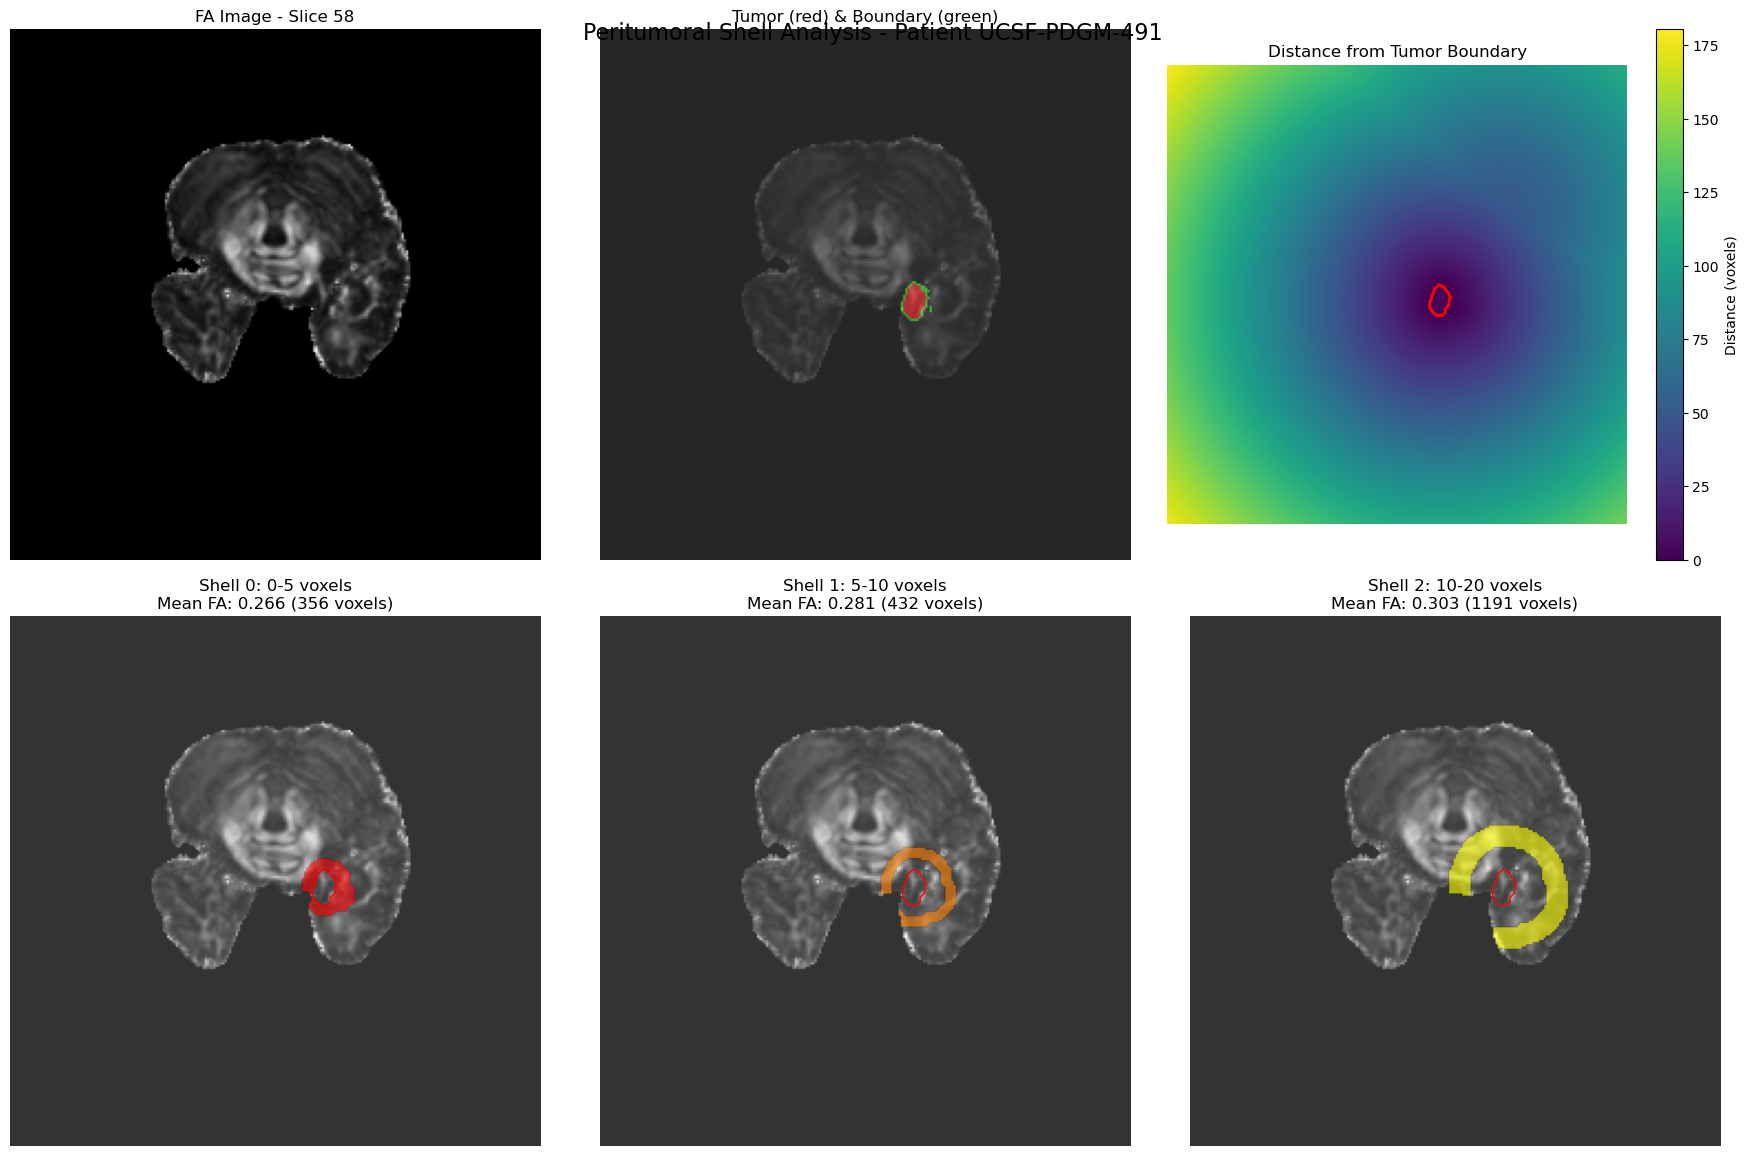


Summary for patient UCSF-PDGM-491:
Tumor volume: 971 voxels
Brain volume: 1389418 voxels
Slice 58 - Tumor area: 120 voxels
Shell 0 (0-5): 356 voxels, FA = 0.2660 ± 0.1598
Shell 1 (5-10): 432 voxels, FA = 0.2807 ± 0.1706
Shell 2 (10-20): 1191 voxels, FA = 0.3028 ± 0.1959
Shell 3 (20-∞): 7567 voxels, FA = 0.2278 ± 0.1429



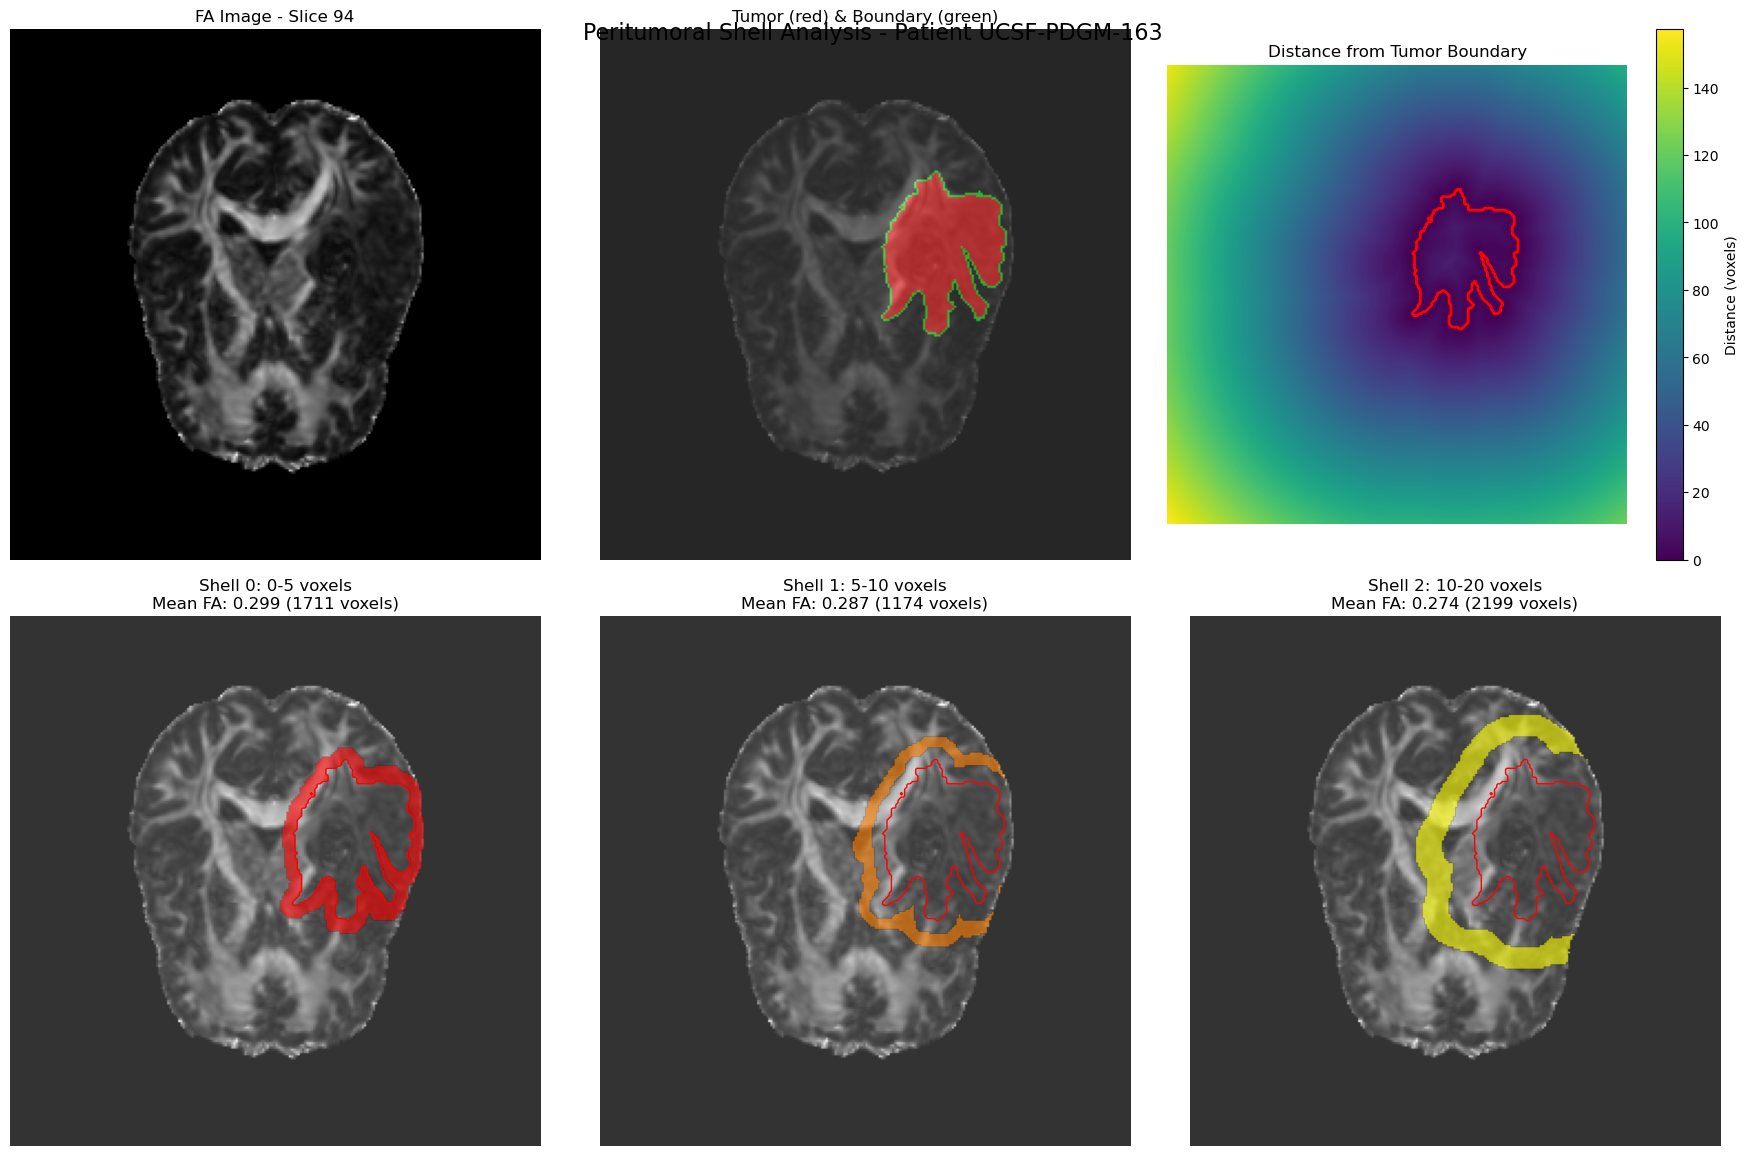


Summary for patient UCSF-PDGM-163:
Tumor volume: 81746 voxels
Brain volume: 1482698 voxels
Slice 94 - Tumor area: 2444 voxels
Shell 0 (0-5): 1711 voxels, FA = 0.2994 ± 0.2107
Shell 1 (5-10): 1174 voxels, FA = 0.2865 ± 0.1803
Shell 2 (10-20): 2199 voxels, FA = 0.2745 ± 0.1698
Shell 3 (20-∞): 10356 voxels, FA = 0.2676 ± 0.1723



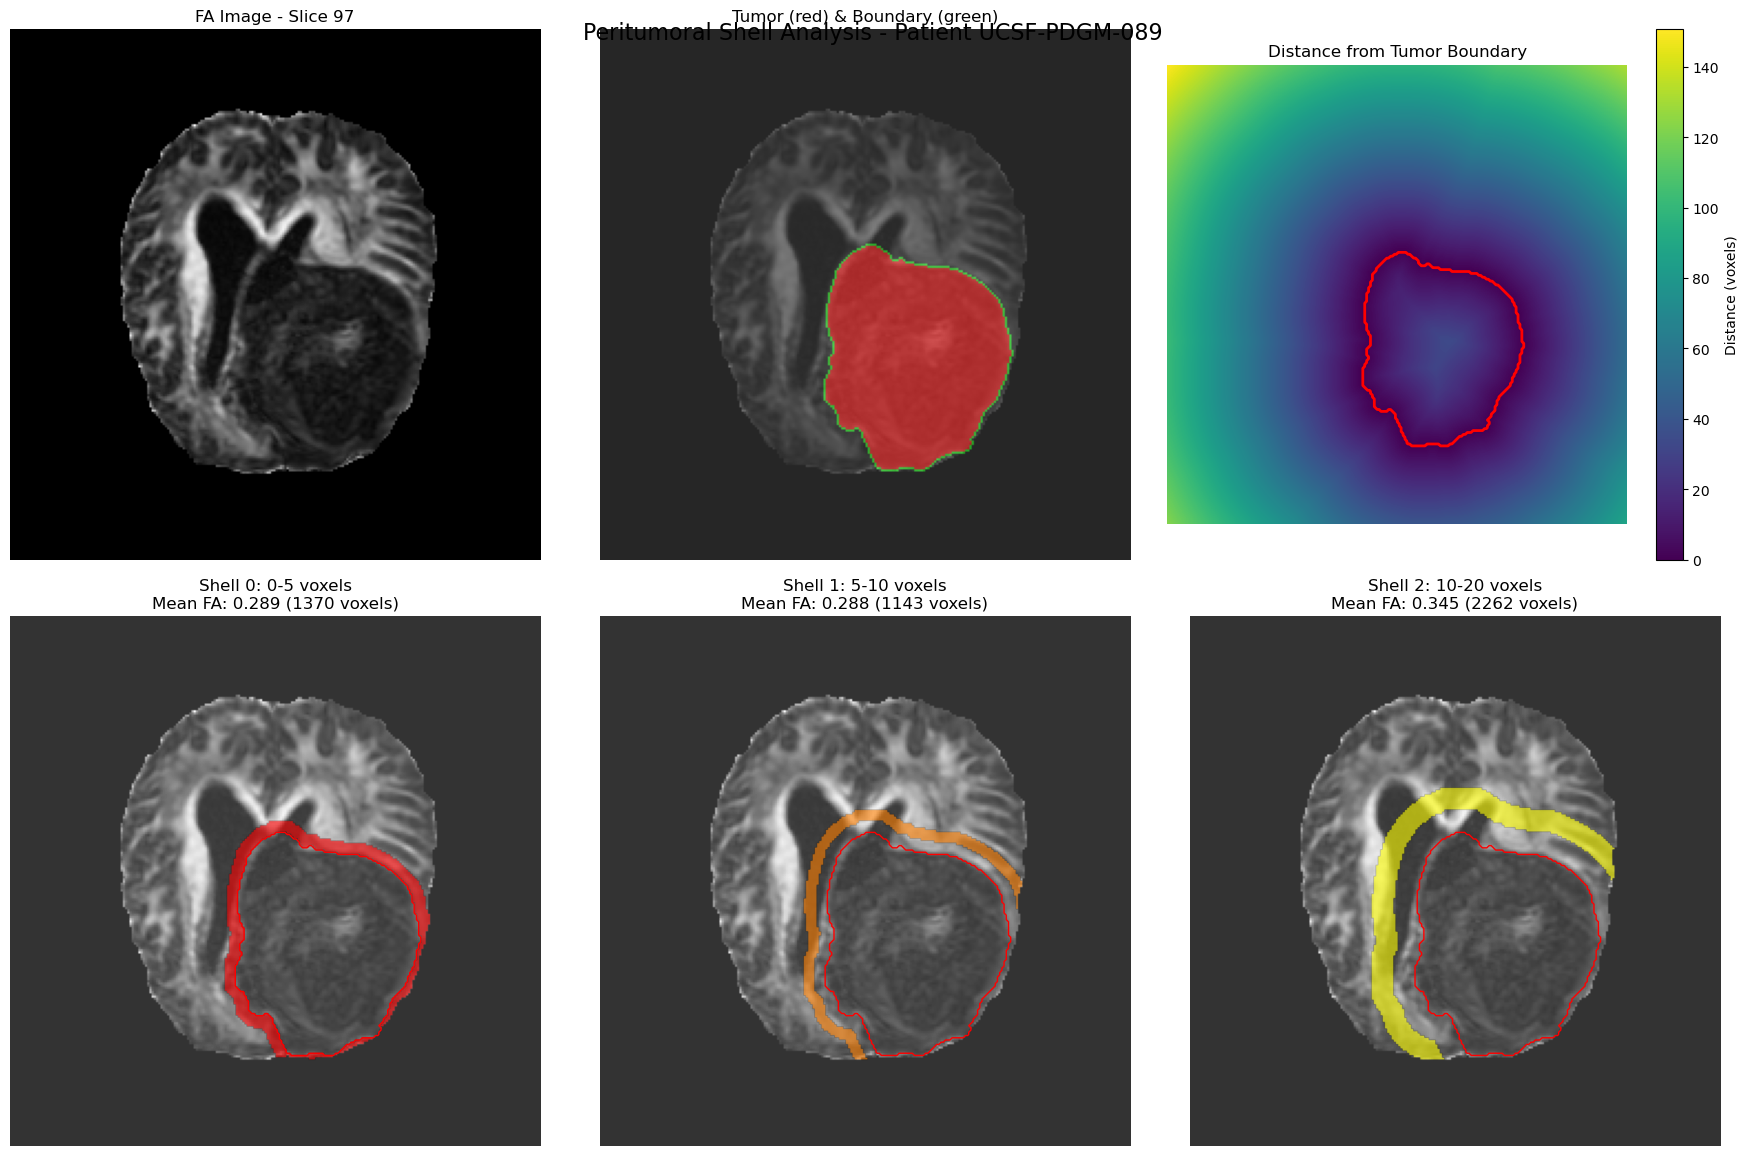


Summary for patient UCSF-PDGM-089:
Tumor volume: 321345 voxels
Brain volume: 1766456 voxels
Slice 97 - Tumor area: 6317 voxels
Shell 0 (0-5): 1370 voxels, FA = 0.2889 ± 0.1548
Shell 1 (5-10): 1143 voxels, FA = 0.2877 ± 0.2135
Shell 2 (10-20): 2262 voxels, FA = 0.3453 ± 0.2197
Shell 3 (20-∞): 8342 voxels, FA = 0.2877 ± 0.1577


In [11]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

def visualize_peritumoral_shells(patient_id, base_path='../shared/data/PDGM/UCSF-PDGM-v5/UCSF-PDGM-v5/'):
    """Visualize peritumoral shells for a specific patient"""
    
    patient_id_padded = patient_id.split('-')[-1].zfill(4)
    
    # File paths
    fa_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                         f'UCSF-PDGM-{patient_id_padded}_DTI_eddy_FA.nii.gz')
    tumor_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_tumor_segmentation.nii.gz')
    brain_path = os.path.join(base_path, f"UCSF-PDGM-{patient_id_padded}_nifti", 
                             f'UCSF-PDGM-{patient_id_padded}_brain_segmentation.nii.gz')
    
    if not all(os.path.exists(p) for p in [fa_path, tumor_path, brain_path]):
        print(f"Files not found for patient {patient_id}")
        return None
    
    # Load data
    fa_data = nib.load(fa_path).get_fdata()
    tumor_mask = nib.load(tumor_path).get_fdata()
    brain_mask = nib.load(brain_path).get_fdata()
    
    # Get tumor center for slice selection
    tumor_coords = np.where(tumor_mask > 0)
    tumor_center_z = int(np.mean(tumor_coords[2]))
    
    # Create brain-not-tumor mask
    brain_indices = np.where(brain_mask > 0.5)
    tumor_binary = tumor_mask > 0
    brain_not_tumor_mask = np.zeros_like(brain_mask, dtype=bool)
    for i in range(len(brain_indices[0])):
        x, y, z = brain_indices[0][i], brain_indices[1][i], brain_indices[2][i]
        if not tumor_binary[x, y, z]:
            brain_not_tumor_mask[x, y, z] = True
    
    # Create tumor boundary
    tumor_dilated = ndimage.binary_dilation(tumor_binary, iterations=1)
    tumor_boundary = tumor_dilated & ~tumor_binary
    
    # Calculate distance transform from tumor boundary
    boundary_distances_3d = ndimage.distance_transform_edt(~tumor_boundary)
    
    # Create shell masks for the central slice
    slice_idx = tumor_center_z
    fa_slice = fa_data[:, :, slice_idx]
    brain_slice = brain_mask[:, :, slice_idx] > 0.5
    tumor_slice = tumor_binary[:, :, slice_idx]
    boundary_slice = tumor_boundary[:, :, slice_idx]
    brain_not_tumor_slice = brain_not_tumor_mask[:, :, slice_idx]
    distances_slice = boundary_distances_3d[:, :, slice_idx]
    
    # Define shells
    boundary_shells = [(0, 5), (5, 10), (10, 20), (20, float('inf'))]
    
    # Create shell masks for visualization
    shell_masks = []
    colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0.5, 0.8, 1)]  # rgb tuples
    labels = ['Shell 0: 0-5 voxels', 'Shell 1: 5-10 voxels', 'Shell 2: 10-20 voxels', 'Shell 3: 20+ voxels']
    
    for i, (min_dist, max_dist) in enumerate(boundary_shells):
        if max_dist != float('inf'):
            shell_mask = (distances_slice >= min_dist) & (distances_slice < max_dist) & brain_not_tumor_slice
        else:
            shell_mask = (distances_slice >= min_dist) & brain_not_tumor_slice
        shell_masks.append(shell_mask)
    
    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Original FA image
    axes[0, 0].imshow(fa_slice.T, cmap='gray', origin='lower')
    axes[0, 0].set_title(f'FA Image - Slice {slice_idx}')
    axes[0, 0].axis('off')
    
    # Tumor and brain masks
    overlay = np.zeros((*fa_slice.shape, 3))
    overlay[tumor_slice, :] = [1, 0, 0]  # Red for tumor
    overlay[boundary_slice, :] = [0, 1, 0]  # Green for boundary
    axes[0, 1].imshow(fa_slice.T, cmap='gray', origin='lower', alpha=0.7)
    axes[0, 1].imshow(overlay.transpose(1, 0, 2), origin='lower', alpha=0.5)
    axes[0, 1].set_title('Tumor (red) & Boundary (green)')
    axes[0, 1].axis('off')
    
    # Distance map
    im = axes[0, 2].imshow(distances_slice.T, cmap='viridis', origin='lower')
    axes[0, 2].contour(tumor_slice.T, levels=[0.5], colors='red', linewidths=2)
    axes[0, 2].set_title('Distance from Tumor Boundary')
    axes[0, 2].axis('off')
    plt.colorbar(im, ax=axes[0, 2], label='Distance (voxels)')
    
    # Individual shell visualizations
    for i in range(3):
        if i < len(shell_masks):
            # Show FA with shell overlay
            axes[1, i].imshow(fa_slice.T, cmap='gray', origin='lower', alpha=0.8)
            
            # Create colored overlay for this shell
            shell_overlay = np.zeros((*fa_slice.shape, 4))
            if np.any(shell_masks[i]):
                shell_overlay[shell_masks[i]] = [*mcolors.to_rgb(colors[i]), 0.6]
            
            axes[1, i].imshow(shell_overlay.transpose(1, 0, 2), origin='lower')
            axes[1, i].contour(tumor_slice.T, levels=[0.5], colors='red', linewidths=1)
            
            # Calculate stats for this shell
            if np.any(shell_masks[i]):
                shell_fa_values = fa_slice[shell_masks[i]]
                mean_fa = np.mean(shell_fa_values)
                voxel_count = np.sum(shell_masks[i])
                axes[1, i].set_title(f'{labels[i]}\nMean FA: {mean_fa:.3f} ({voxel_count} voxels)')
            else:
                axes[1, i].set_title(f'{labels[i]}\nNo voxels in shell')
            
            axes[1, i].axis('off')
    
    plt.suptitle(f'Peritumoral Shell Analysis - Patient {patient_id}', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()
    
    # Print summary stats
    print(f"\nSummary for patient {patient_id}:")
    print(f"Tumor volume: {np.sum(tumor_binary)} voxels")
    print(f"Brain volume: {np.sum(brain_mask > 0.5)} voxels")
    print(f"Slice {slice_idx} - Tumor area: {np.sum(tumor_slice)} voxels")
    
    for i, (min_dist, max_dist) in enumerate(boundary_shells):
        voxel_count = np.sum(shell_masks[i])
        if voxel_count > 0:
            shell_fa_values = fa_slice[shell_masks[i]]
            print(f"Shell {i} ({min_dist}-{max_dist if max_dist != float('inf') else '∞'}): {voxel_count} voxels, FA = {np.mean(shell_fa_values):.4f} ± {np.std(shell_fa_values):.4f}")
        else:
            print(f"Shell {i} ({min_dist}-{max_dist if max_dist != float('inf') else '∞'}): 0 voxels")

# Example usage - visualize a few patients
df = pd.read_csv('patient_level_peritumoral_features.csv')

# Pick patients with different tumor sizes
small_tumor = df.loc[df['tumor_volume'].idxmin(), 'patient_id']
large_tumor = df.loc[df['tumor_volume'].idxmax(), 'patient_id'] 
median_tumor = df.loc[df['tumor_volume'].argsort().iloc[len(df)//2], 'patient_id']

print("Visualizing patients with different tumor sizes...")
print(f"Small tumor: {small_tumor}")
print(f"Median tumor: {median_tumor}")
print(f"Large tumor: {large_tumor}")

# Visualize each
for patient in [small_tumor, median_tumor, large_tumor]:
    print(f"\n{'='*60}")
    visualize_peritumoral_shells(patient)